In [1]:
import pandas as pd
import statistics
import numpy as np
import seaborn as sns
import tabulate
import matplotlib.pyplot as plt
from fastdtw import fastdtw  #Package pour calculer les distances entre 2 séries de tailles différentes
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import concurrent.futures

# Exploratory Data Analysis

## Loading and creating different dataframes

In [2]:
df=pd.read_json("match_1.json")
df2=pd.read_json("match_2.json")

full_df = pd.concat([df,df2])
full_df.reset_index(drop=True, inplace=True)

In [3]:
df['longueur'] = df['norm'].apply(lambda x: len(x))
df2['longueur'] = df2['norm'].apply(lambda x: len(x))
full_df['longueur'] = full_df['norm'].apply(lambda x: len(x))


#df['min'] = df['norm'].apply(lambda x: min(x))
#df['max'] = df['norm'].apply(lambda x: max(x))
#df['mean'] = df['norm'].apply(lambda x: statistics.mean(x))

#df2['min'] = df2['norm'].apply(lambda x: min(x))
#df2['max'] = df2['norm'].apply(lambda x: max(x))
#df2['mean'] = df2['norm'].apply(lambda x: statistics.mean(x))

full_df['min'] = full_df['norm'].apply(lambda x: min(x))
full_df['max'] = full_df['norm'].apply(lambda x: max(x))
full_df['mean'] = full_df['norm'].apply(lambda x: statistics.mean(x))

## Statistical Analysis

In [4]:
#print(full_df.groupby('label')[['longueur','min','max','mean']].agg(['mean','min','max','sum','count']))


             longueur                              min                        \
                 mean min  max    sum count       mean        min        max   
label                                                                          
cross       52.500000  30   72    210     4  12.619630   4.101426  24.805225   
dribble     39.256410   3  100   3062    78  14.323510   3.979596  40.056210   
no action  134.000000  76  192    268     2   4.709407   4.233360   5.185455   
pass        42.687500   3  102   1366    32  16.705475   6.310896  65.472226   
rest       115.771429  18  723   4052    35  15.396717   5.072868  19.019414   
run         37.657609   1   94  20787   552  14.956424   1.674630  48.603239   
shot        33.777778   4   66    608    18  23.971054  10.425894  42.575182   
tackle      46.225806  20  118   1433    31  13.173210   3.561442  34.400466   
walk        55.326437   8  179  24067   435  12.308385   1.999615  22.441406   

                                     ma

We clearly see a difference in the accelerometer measure for the shots, rest, and walk compared to the other actions. We can also point out that the actions "cross", "no action" and "shot" do not appear frequently in the dataset. 

In [4]:
def calculate_statistics(series):
    mean_value = series.mean()
    median_value = series.median()
    std_deviation = series.std()
    percentile_95 = series.quantile(0.95)
    max_val = series.max()
    min_val = series.min()

    
    return mean_value, median_value, std_deviation, percentile_95, max_val, min_val

In [5]:
actions = {}
for label in ['walk', 'rest', 'run', 'tackle', 'dribble', 'pass', 'cross', 'shot', 'no action']:
    combin_lab = full_df[full_df['label']==label]
    lab_df = combin_lab['norm'].explode()

    mean, median, std, percentile_95, max_val, min_val = calculate_statistics(lab_df)

    print("STATISTICS FOR THE ACTION : ", label)
    print("Mean:", mean)
    print("Median:", median)
    print("Standard Deviation:", std)
    print("95th Percentile:", percentile_95)
    print("Max :", max_val)
    print("Min :", min_val)
    print("--------------------")


    actions[label] = {
        'mean': mean,
        'std': std,
        '95 per': percentile_95,
        'median': median
    }


    del mean, median, std, percentile_95, max_val, min_val, lab_df, combin_lab

STATISTICS FOR THE ACTION :  walk
Mean: 28.320189265213653
Median: 23.780701942807543
Standard Deviation: 15.13108615609897
95th Percentile: 52.84842639752487
Max : 549.5750681191864
Min : 1.999615484483988
--------------------
STATISTICS FOR THE ACTION :  rest
Mean: 21.741159926079078
Median: 20.769884284937664
Standard Deviation: 4.603694214771405
95th Percentile: 28.615552580136672
Max : 101.9427471459145
Min : 5.072868360471503
--------------------
STATISTICS FOR THE ACTION :  run
Mean: 53.2052595508952
Median: 43.03405727070558
Standard Deviation: 46.913965269558034
95th Percentile: 120.79841204367143
Max : 759.8614139522053
Min : 1.674629720598801
--------------------
STATISTICS FOR THE ACTION :  tackle
Mean: 65.58008355251444
Median: 44.771698256303644
Standard Deviation: 75.07931691290578
95th Percentile: 182.92057566536664
Max : 739.2771908152429
Min : 3.561441685329417
--------------------
STATISTICS FOR THE ACTION :  dribble
Mean: 57.36999217117668
Median: 45.354258156642395

In [170]:
actions

{'walk': {'mean': 28.320189265213653,
  'std': 15.13108615609897,
  '95 per': 52.84842639752487,
  'median': 23.780701942807543},
 'rest': {'mean': 21.741159926079078,
  'std': 4.603694214771405,
  '95 per': 28.615552580136672,
  'median': 20.769884284937664},
 'run': {'mean': 53.2052595508952,
  'std': 46.913965269558034,
  '95 per': 120.79841204367143,
  'median': 43.03405727070558},
 'tackle': {'mean': 65.58008355251444,
  'std': 75.07931691290578,
  '95 per': 182.92057566536664,
  'median': 44.771698256303644},
 'dribble': {'mean': 57.36999217117668,
  'std': 49.42118635814242,
  '95 per': 137.33490801330177,
  'median': 45.354258156642395},
 'pass': {'mean': 61.63990125519581,
  'std': 61.05102814871932,
  '95 per': 161.38433042509217,
  'median': 40.61525054933571},
 'cross': {'mean': 53.47835908573044,
  'std': 54.231562335130974,
  '95 per': 158.86481050101338,
  'median': 35.711433838130276},
 'shot': {'mean': 107.20375032008731,
  'std': 105.85288486307326,
  '95 per': 326.49

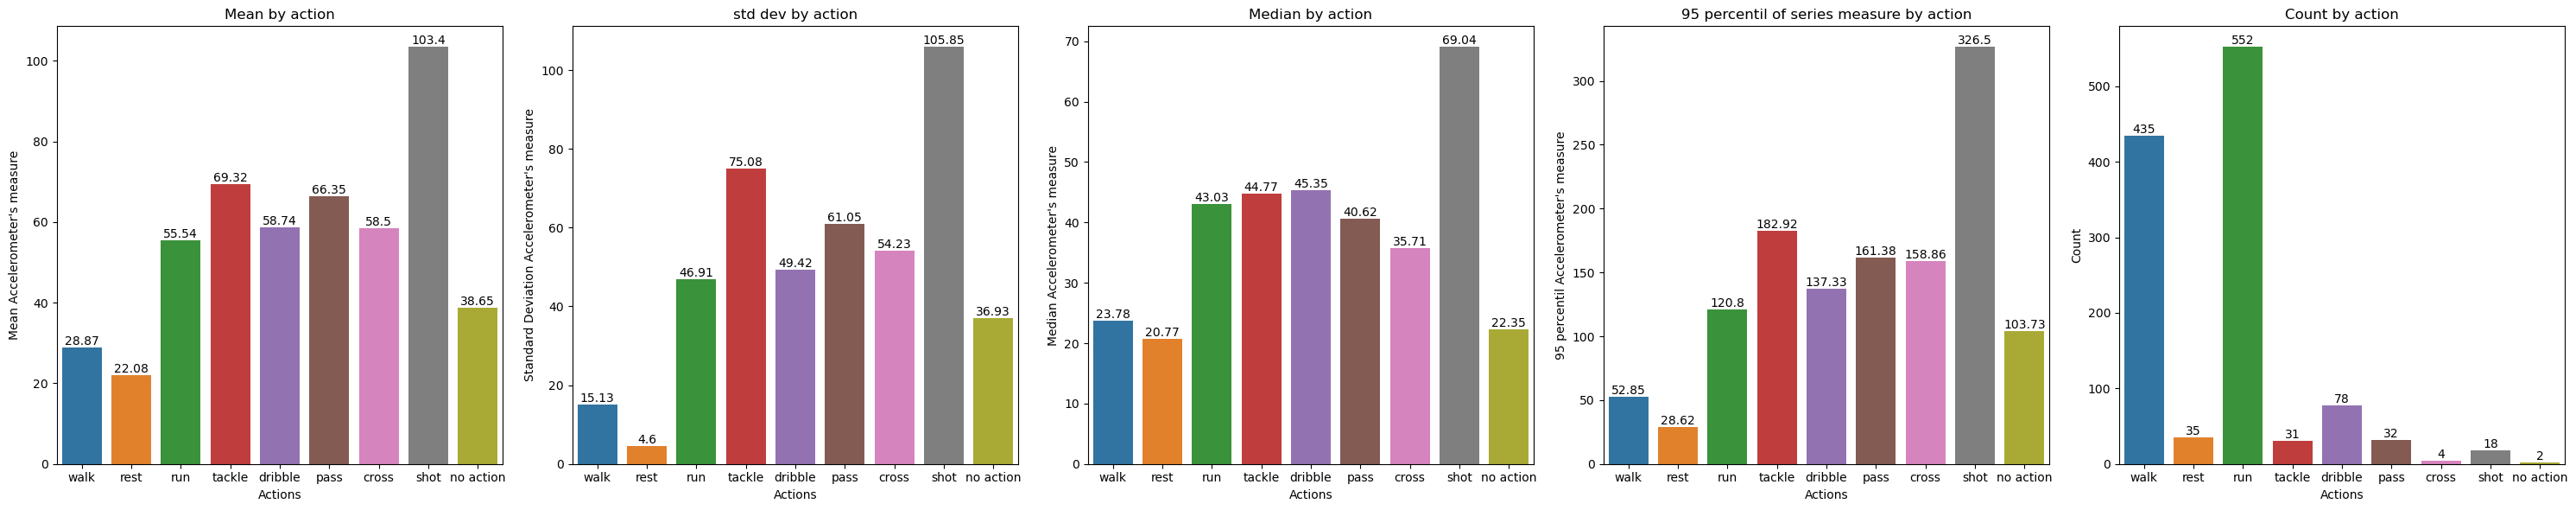

In [7]:
fig, axes = plt.subplots(1, 5, figsize=(30, 6))
unique_labels = full_df['label'].unique()
# Plot the first bar plot
sns.barplot(x=unique_labels, y=full_df.groupby('label')['mean'].mean().reindex(unique_labels).values, ax=axes[0])
axes[0].set_xlabel('Actions')
axes[0].set_ylabel('Mean Accelerometer\'s measure')
axes[0].set_title('Mean by action')
axes[0].bar_label(axes[0].containers[0], labels=np.round(full_df.groupby('label')['mean'].mean().reindex(unique_labels).values,2))

# Plot the second bar plot (copy and modify the code as needed)
sns.barplot(x=unique_labels, y=pd.DataFrame(actions).T['std'].values, ax=axes[1])
axes[1].set_xlabel('Actions')
axes[1].set_ylabel('Standard Deviation Accelerometer\'s measure')
axes[1].set_title('std dev by action')
axes[1].bar_label(axes[1].containers[0], labels=np.round(pd.DataFrame(actions).T['std'].values,2))

# Plot the third bar plot (copy and modify the code as needed)
sns.barplot(x=unique_labels, y=pd.DataFrame(actions).T['median'].values, ax=axes[2])
axes[2].set_xlabel('Actions')
axes[2].set_ylabel('Median Accelerometer\'s measure')
axes[2].set_title('Median by action')
axes[2].bar_label(axes[2].containers[0], labels=np.round(pd.DataFrame(actions).T['median'].values,2))


sns.barplot(x=unique_labels, y=pd.DataFrame(actions).T['95 per'].values, ax=axes[3])
axes[3].set_xlabel('Actions')
axes[3].set_ylabel('95 percentil Accelerometer\'s measure')
axes[3].set_title('95 percentil of series measure by action')
axes[3].bar_label(axes[3].containers[0], labels=np.round(pd.DataFrame(actions).T['95 per'].values,2))

sns.barplot(x=unique_labels, y=full_df.groupby('label').agg(['count'])['norm']['count'].reindex(unique_labels), ax=axes[4])
axes[4].set_xlabel('Actions')
axes[4].set_ylabel('Count')
axes[4].set_title('Count by action')
axes[4].bar_label(axes[4].containers[0], labels=full_df.groupby('label').agg(['count'])['norm']['count'].reindex(unique_labels))
# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

To get a better understanding of the actions and their appearence in a game it seems interesting to have a look from a power perspective. We can see in the data that some actions are highly consumming energy (shot, pass, tackle) while some others are there to help the player get it's energy back (rest/walk). I want to understand the frequency of those action during a game

In [6]:
Long = {}
for label in ['walk', 'rest', 'run', 'tackle', 'dribble', 'pass', 'cross', 'shot', 'no action']:
    combin_lab = full_df[full_df['label']==label]
    lab_df = combin_lab['longueur'].explode()

    mean, median, std, percentile_95, max_val, min_val = calculate_statistics(lab_df)

    print("STATISTICS FOR THE ACTION : ", label)
    print("Mean:", mean)
    print("Median:", median)
    print("Standard Deviation:", std)
    print("95th Percentile:", percentile_95)
    print("Max :", max_val)
    print("Min :", min_val)
    print("--------------------")


    Long[label] = {
        'mean': mean,
        'std': std,
        '95 per': percentile_95,
        'median': median
    }


    del mean, median, std, percentile_95, max_val, min_val, lab_df, combin_lab

STATISTICS FOR THE ACTION :  walk
Mean: 55.326436781609196
Median: 54.0
Standard Deviation: 17.245292283339662
95th Percentile: 79.59999999999991
Max : 179
Min : 8
--------------------
STATISTICS FOR THE ACTION :  rest
Mean: 115.77142857142857
Median: 76.0
Standard Deviation: 124.03654246046291
95th Percentile: 248.8999999999998
Max : 723
Min : 18
--------------------
STATISTICS FOR THE ACTION :  run
Mean: 37.65760869565217
Median: 35.0
Standard Deviation: 13.681116056741743
95th Percentile: 64.89999999999986
Max : 94
Min : 1
--------------------
STATISTICS FOR THE ACTION :  tackle
Mean: 46.225806451612904
Median: 40.0
Standard Deviation: 24.13532635981175
95th Percentile: 101.0
Max : 118
Min : 20
--------------------
STATISTICS FOR THE ACTION :  dribble
Mean: 39.256410256410255
Median: 36.0
Standard Deviation: 17.30132935170004
95th Percentile: 66.14999999999999
Max : 100
Min : 3
--------------------
STATISTICS FOR THE ACTION :  pass
Mean: 42.6875
Median: 33.0
Standard Deviation: 25.7

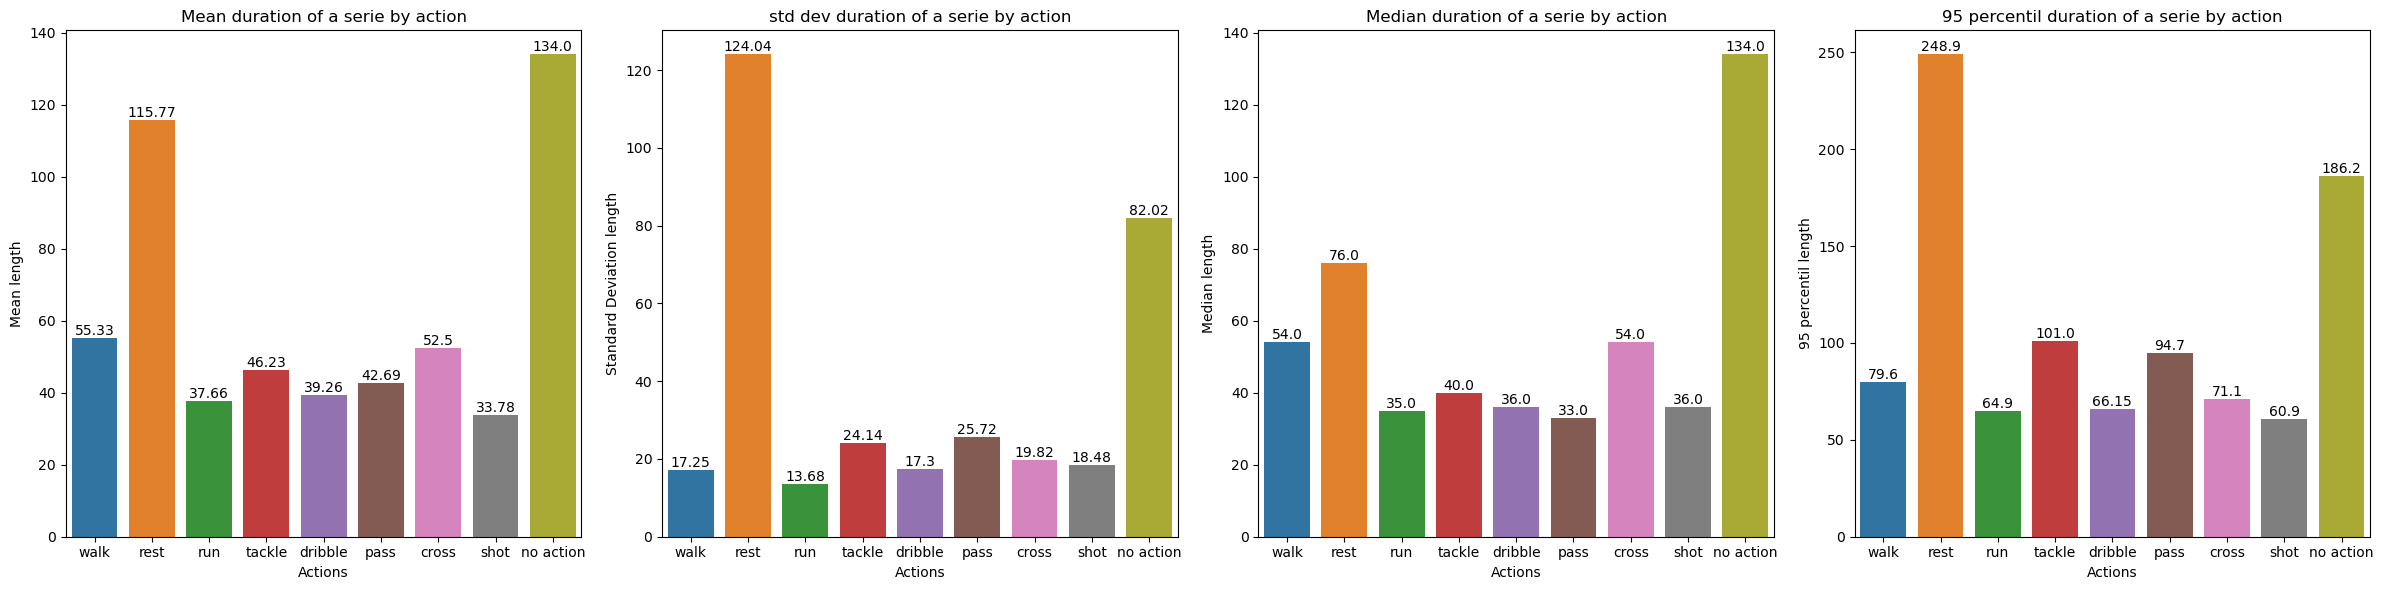

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(24, 6))
unique_labels = full_df['label'].unique()
# Plot the first bar plot
sns.barplot(x=unique_labels, y=full_df.groupby('label')['longueur'].mean().reindex(unique_labels).values, ax=axes[0])
axes[0].set_xlabel('Actions')
axes[0].set_ylabel('Mean length')
axes[0].set_title('Mean duration of a serie by action')
axes[0].bar_label(axes[0].containers[0], labels=np.round(full_df.groupby('label')['longueur'].mean().reindex(unique_labels).values,2))

# Plot the second bar plot (copy and modify the code as needed)
sns.barplot(x=unique_labels, y=pd.DataFrame(Long).T['std'].values, ax=axes[1])
axes[1].set_xlabel('Actions')
axes[1].set_ylabel('Standard Deviation length')
axes[1].set_title('std dev duration of a serie by action')
axes[1].bar_label(axes[1].containers[0], labels=np.round(pd.DataFrame(Long).T['std'].values,2))

# Plot the third bar plot (copy and modify the code as needed)
sns.barplot(x=unique_labels, y=pd.DataFrame(Long).T['median'].values, ax=axes[2])
axes[2].set_xlabel('Actions')
axes[2].set_ylabel('Median length')
axes[2].set_title('Median duration of a serie by action')
axes[2].bar_label(axes[2].containers[0], labels=np.round(pd.DataFrame(Long).T['median'].values,2))


sns.barplot(x=unique_labels, y=pd.DataFrame(Long).T['95 per'].values, ax=axes[3])
axes[3].set_xlabel('Actions')
axes[3].set_ylabel('95 percentil length')
axes[3].set_title('95 percentil duration of a serie by action')
axes[3].bar_label(axes[3].containers[0], labels=np.round(pd.DataFrame(Long).T['95 per'].values,2))


# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

In [7]:
Full_data_1 = df['norm'].explode().reset_index(drop=True)
Full_data_2 = df2['norm'].explode().reset_index(drop=True)

In [8]:
Valeur_effort = 29
Nombre_action_seconde = 50

Puissance_seconde_1 = [
    sum(Full_data_1[i:i + Nombre_action_seconde])
    for i in range(0, len(Full_data_1) - Nombre_action_seconde  + 1, Nombre_action_seconde )
]

Puissance_seconde_2 = [
    sum(Full_data_2[i:i + Nombre_action_seconde])
    for i in range(0, len(Full_data_2) - Nombre_action_seconde  + 1, Nombre_action_seconde )
]

We take 29 as the value for the accelerometer where the player is resting (95% of the data for rest is below this value). Meaning that every action with a power above 29*50 per second (because we have 50 measures per seconds) will result in a decrease of energy for the player while everything below will help him recover

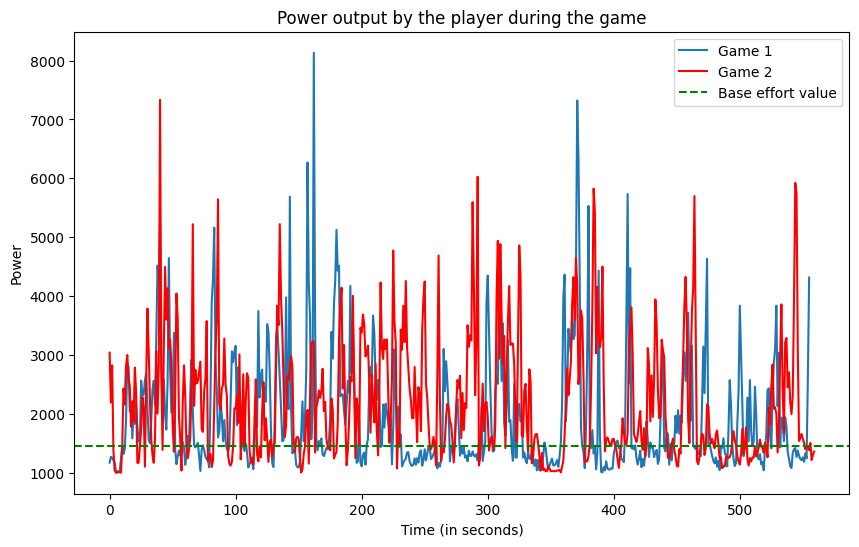

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Puissance_seconde_1)), Puissance_seconde_1, label = 'Game 1')
plt.plot(range(len(Puissance_seconde_2)), Puissance_seconde_2, color='r', label = 'Game 2')
plt.axhline(y=Valeur_effort*Nombre_action_seconde, color='g', linestyle='--', label='Base effort value')

plt.xlabel('Time (in seconds)')
plt.ylabel('Power')
plt.title('Power output by the player during the game')
plt.legend()
plt.show()

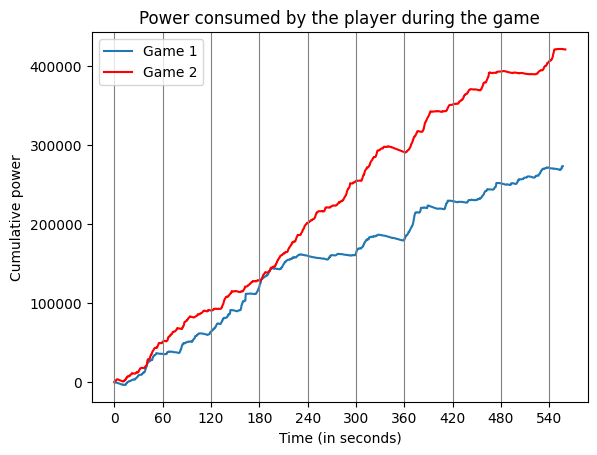

In [10]:
data_subtracted_1 = Full_data_1 - 29
data_subtracted_2 = Full_data_2 - 29

# Calculate the cumulative sum of the subtracted series
cumulative_data_1 = data_subtracted_1.cumsum()
cumulative_data_2 = data_subtracted_2.cumsum()

# Plot the cumulative data
plt.plot(cumulative_data_1, label='Game 1')
plt.plot(cumulative_data_2, color='r', label='Game 2')
plt.xlabel('Time (in seconds)')
plt.ylabel('Cumulative power')
plt.title('Power consumed by the player during the game')

# Customize x-axis ticks
plt.xticks(range(0, len(cumulative_data_2), 60 * 50), [str(i) for i in range(0, int(len(cumulative_data_2) / 50), 60)])

# Add vertical lines
for x in range(0, len(cumulative_data_2), 60 * 50):
    plt.axvline(x=x, color='grey', linewidth=0.8)

# Add a legend
plt.legend()

plt.show()

We can see that the power output is really different between the 2 games. This can be used a factor to play with the intensity when we will generate our own games

GAME 1
-------
Minute 1: Power output = 35936.46448818967
Minute 2: Power output = 28188.145047033595
Minute 3: Power output = 56927.774662357035
Minute 4: Power output = 39094.37047100841
Minute 5: Power output = 3253.93942571741
Minute 6: Power output = 17029.57685915574
Minute 7: Power output = 48974.012028525714
Minute 8: Power output = 22563.03142891843
Minute 9: Power output = 19721.014146335034
Maximal power output for Game 1: 271688.328557241


GAME 2
-------
Minute 1: Power output = 51444.24550164738
Minute 2: Power output = 39589.49516204849
Minute 3: Power output = 37935.99226543176
Minute 4: Power output = 72933.97889115413
Minute 5: Power output = 52878.339059600796
Minute 6: Power output = 36579.37692854202
Minute 7: Power output = 60263.454628571955
Minute 8: Power output = 42071.05410199185
Minute 9: Power output = 12822.375477307107
Maximal power output for Game 2: 406518.31201629556




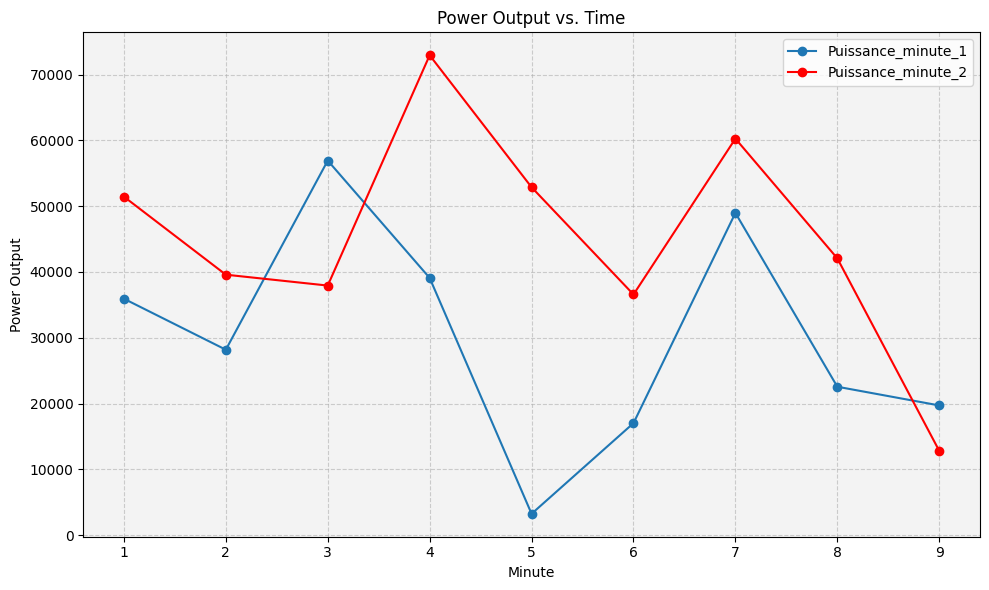

In [11]:
Puissance_recup = 0
Puissance_effort = 0
Puissance_minute_1 = []
t = 0
minute_power = 0  # Initialize power for the current minute


print("GAME 1")
print("-------")
for i in range(len(Puissance_seconde_1)):
    if Puissance_seconde_1[i] <= Nombre_action_seconde * Valeur_effort:
        Puissance_recup = Puissance_recup + ((Nombre_action_seconde * Valeur_effort) - Puissance_seconde_1[i])
    else:
        Puissance_effort = Puissance_effort + (Puissance_seconde_1[i] - (Nombre_action_seconde * Valeur_effort))

    if (i + 1) % 60 == 0:  # Check if a minute has passed (assuming 60 data points per minute)
        t += 1
        Puissance_max_1 = Puissance_effort - Puissance_recup


        Puissance_minute_1.append(Puissance_max_1)

        # Reset power values for the next minute
        Puissance_recup = 0
        Puissance_effort = 0

# Print the power output for each minute
for minute, power in enumerate(Puissance_minute_1, start=1):
    print(f"Minute {minute}: Power output = {power}")

# Print the maximal power output for the entire game
print("Maximal power output for Game 1:", sum(Puissance_minute_1))
print('\n')

Puissance_recup = 0
Puissance_effort = 0
Puissance_minute_2 = []
t = 0
minute_power = 0  # Initialize power for the current minute


print("GAME 2")
print("-------")
for i in range(len(Puissance_seconde_2)):
    if Puissance_seconde_2[i] <= Nombre_action_seconde * Valeur_effort:
        Puissance_recup = Puissance_recup + ((Nombre_action_seconde * Valeur_effort) - Puissance_seconde_2[i])
    else:
        Puissance_effort = Puissance_effort + (Puissance_seconde_2[i] - (Nombre_action_seconde * Valeur_effort))

    if (i + 1) % 60 == 0:  # Check if a minute has passed (assuming 60 data points per minute)
        t += 1
        Puissance_max_2 = Puissance_effort - Puissance_recup


        Puissance_minute_2.append(Puissance_max_2)

        # Reset power values for the next minute
        Puissance_recup = 0
        Puissance_effort = 0

# Print the power output for each minute
for minute, power in enumerate(Puissance_minute_2, start=1):
    print(f"Minute {minute}: Power output = {power}")

# Print the maximal power output for the entire game
print("Maximal power output for Game 2:", sum(Puissance_minute_2))
print('\n')


# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create x-axis values from 1 to 9 (instead of 0 to 8)
x_values = np.arange(1, 10)

# Plot Puissance_minute_1 as a line plot with blue color and label
ax.plot(x_values, Puissance_minute_1, marker='o', linestyle='-', label='Puissance_minute_1')

# Plot Puissance_minute_2 as a line plot with red color and label
ax.plot(x_values, Puissance_minute_2, marker='o', linestyle='-', color='r', label='Puissance_minute_2')

# Set x-axis ticks and labels
ax.set_xticks(x_values)
ax.set_xticklabels(x_values)

# Set axis labels and a title
ax.set_xlabel('Minute')
ax.set_ylabel('Power Output')
ax.set_title('Power Output vs. Time')

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.6)

# Add a legend
ax.legend()

# Customize the appearance (optional)
ax.set_facecolor('#f3f3f3')
plt.rcParams['axes.edgecolor'] = '#333F4B'
plt.rcParams['axes.linewidth'] = 0.8

# Show the plot
plt.tight_layout()
plt.show()

In [12]:
Game_1 = df.explode('norm')[['label','norm']].reset_index(drop=True)
Game_2 = df2.explode('norm')[['label','norm']].reset_index(drop=True)

In [13]:
# Create a dictionary to map string labels to integer values
label_mapping = {'walk': 0, 'rest': 1, 'run': 2, 'tackle': 3, 'dribble': 4, 'pass': 5, 'cross': 6, 'shot': 7, 'no action': 8}

# Convert string labels to integers using list comprehension
Game_1['label'] = [label_mapping[label] for label in Game_1['label']]
Game_2['label'] = [label_mapping[label] for label in Game_2['label']]

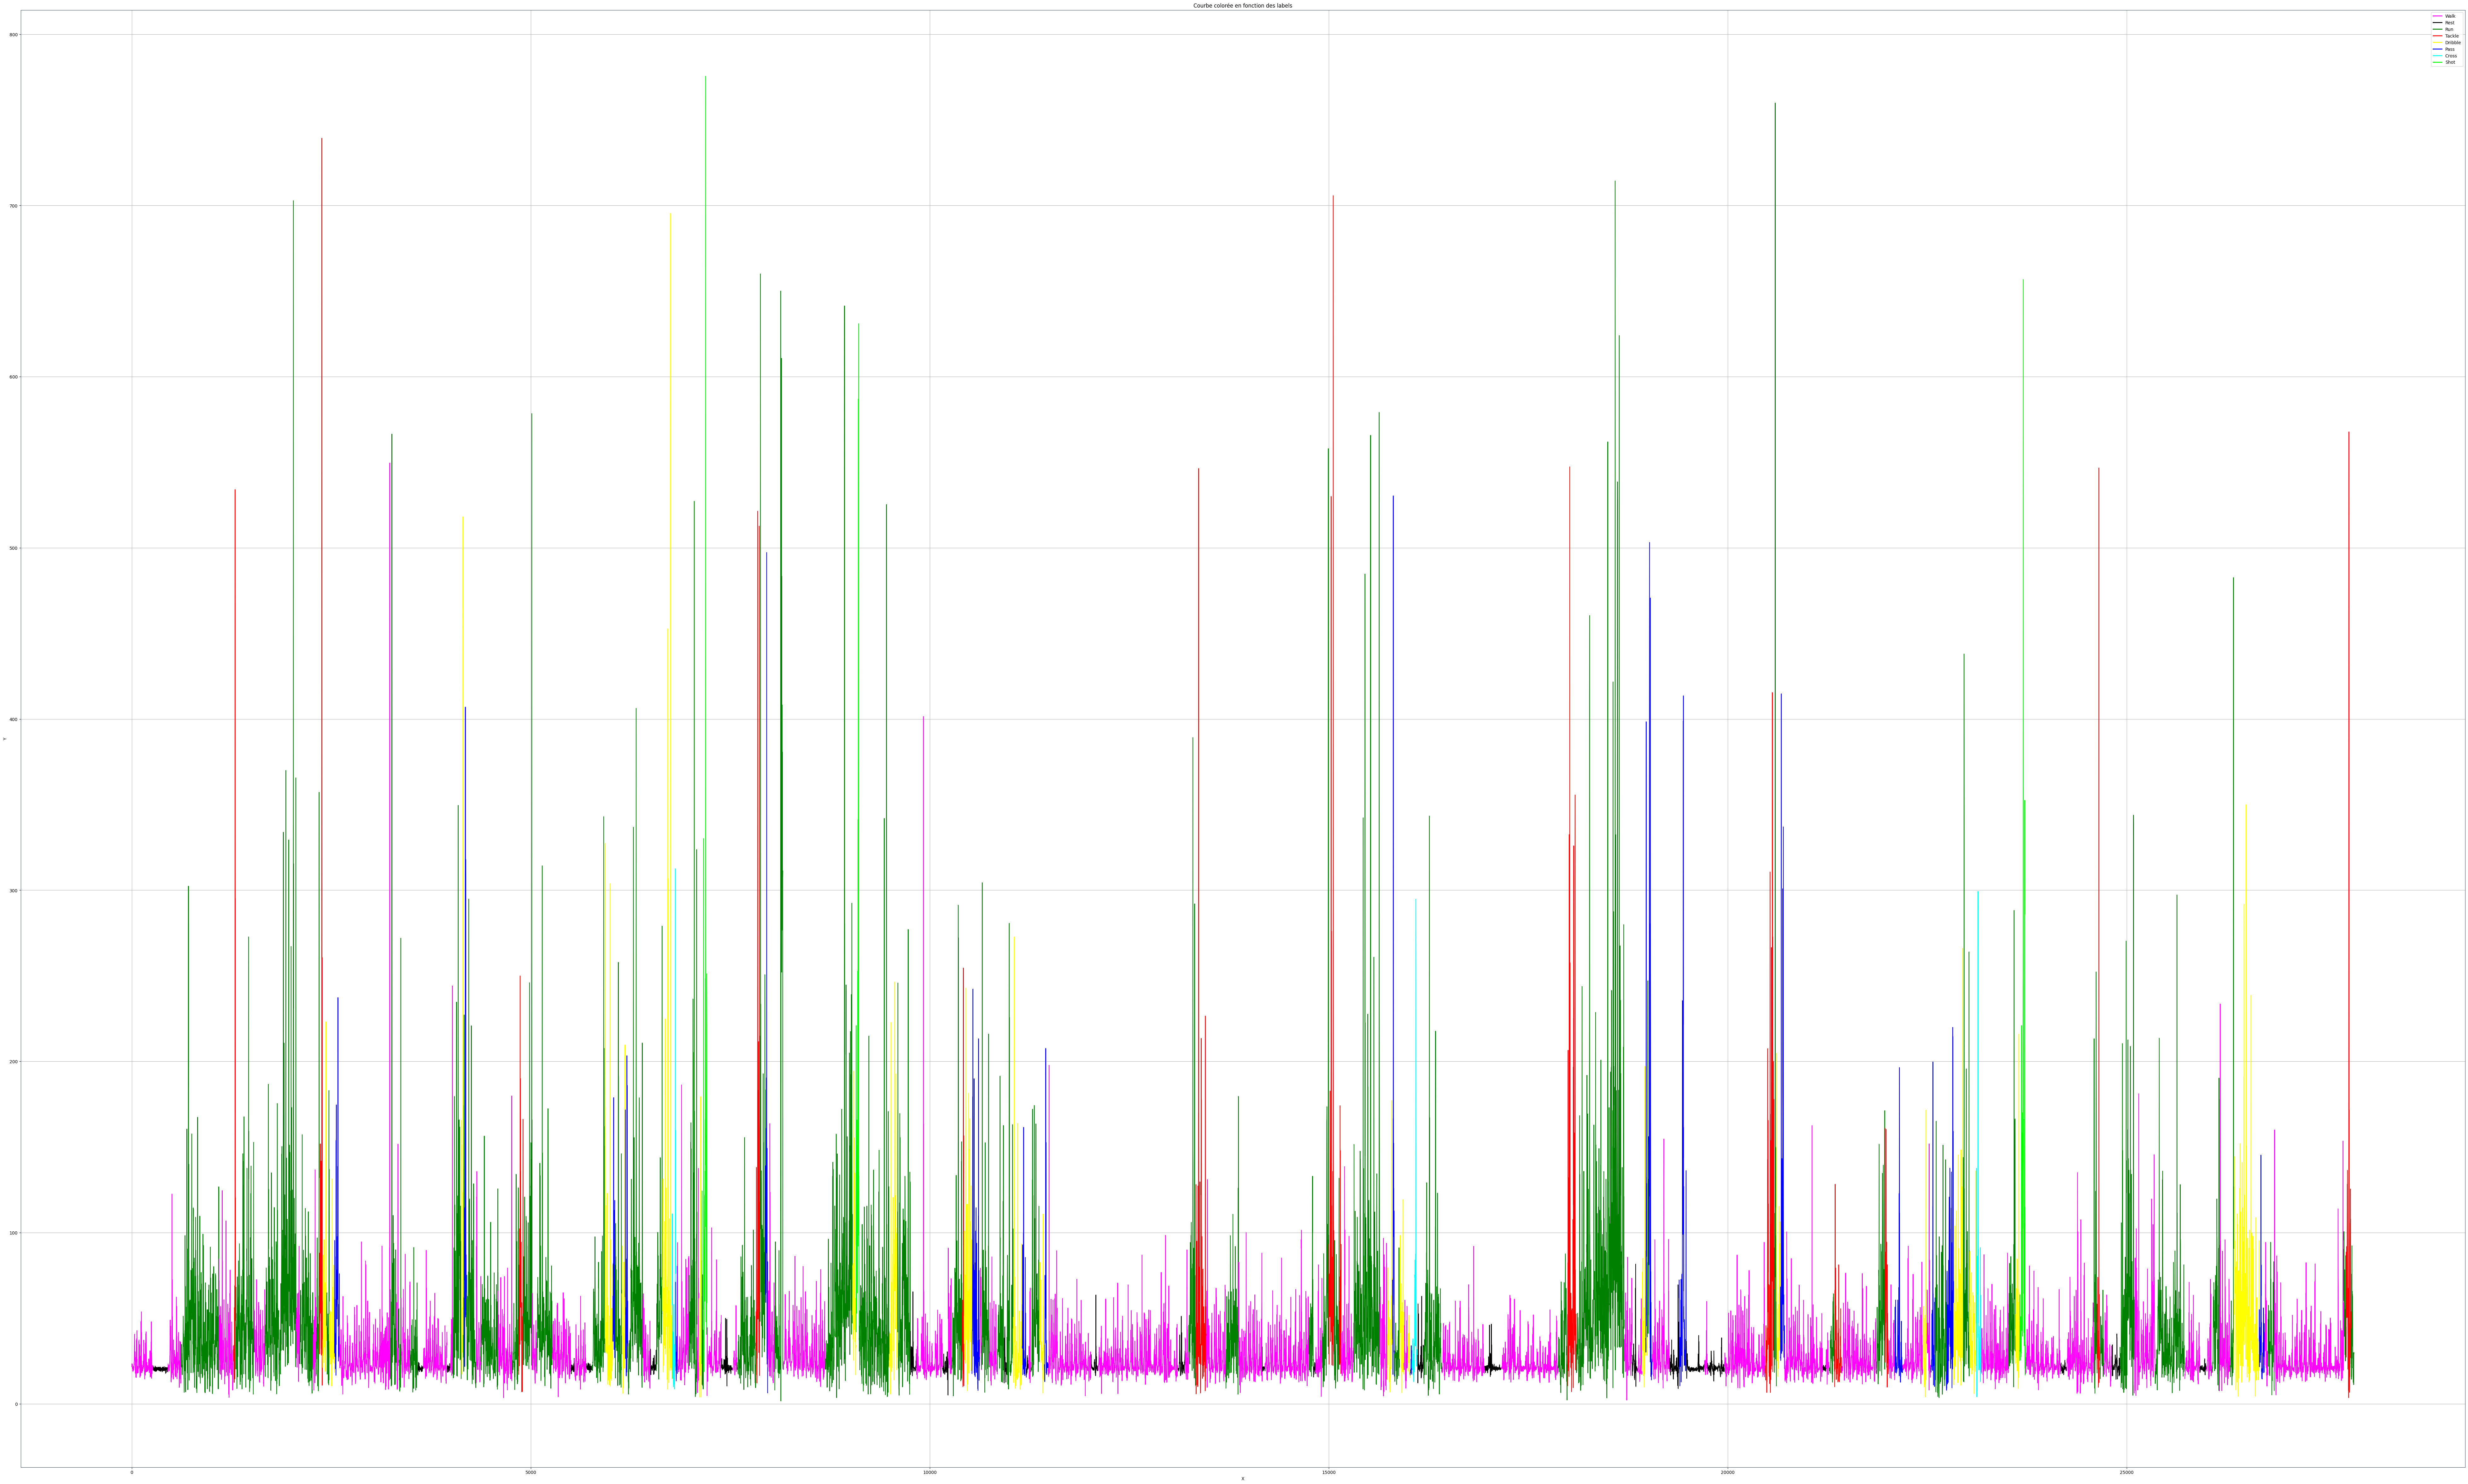

In [14]:
x = Game_1.index
y = Game_1['norm']
labels = Game_1['label']

# Création de la figure et du graphe
plt.figure(figsize=(100, 60))

# Définition des couleurs correspondantes aux labels
colors = ['fuchsia', 'black', 'green', 'red', 'yellow', 'blue', 'cyan', 'lime', 'silver']

# Tracer la courbe en colorant en fonction des labels
current_label = labels[0]
current_segment_start = 0

for i in range(1, len(x)):
    if labels[i] != current_label:
        plt.plot(x[current_segment_start:i], y[current_segment_start:i], color=colors[current_label], label=f'Label {current_label}')
        current_label = labels[i]
        current_segment_start = i

legend_elements = [
    Line2D([0], [0], color='fuchsia', lw=2, label='Walk'),
    Line2D([0], [0], color='black', lw=2, label='Rest'),
    Line2D([0], [0], color='green', lw=2, label='Run'),
    Line2D([0], [0], color='red', lw=2, label='Tackle'),
    Line2D([0], [0], color='yellow', lw=2, label='Dribble'),
    Line2D([0], [0], color='blue', lw=2, label='Pass'),
    Line2D([0], [0], color='cyan', lw=2, label='Cross'),
    Line2D([0], [0], color='lime', lw=2, label='Shot'),
]

# Tracer le dernier segment
plt.plot(x[current_segment_start:], y[current_segment_start:], color=colors[current_label], label=f'Label {current_label}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Courbe colorée en fonction des labels')
plt.legend(handles=legend_elements)
plt.grid(True)
plt.show()

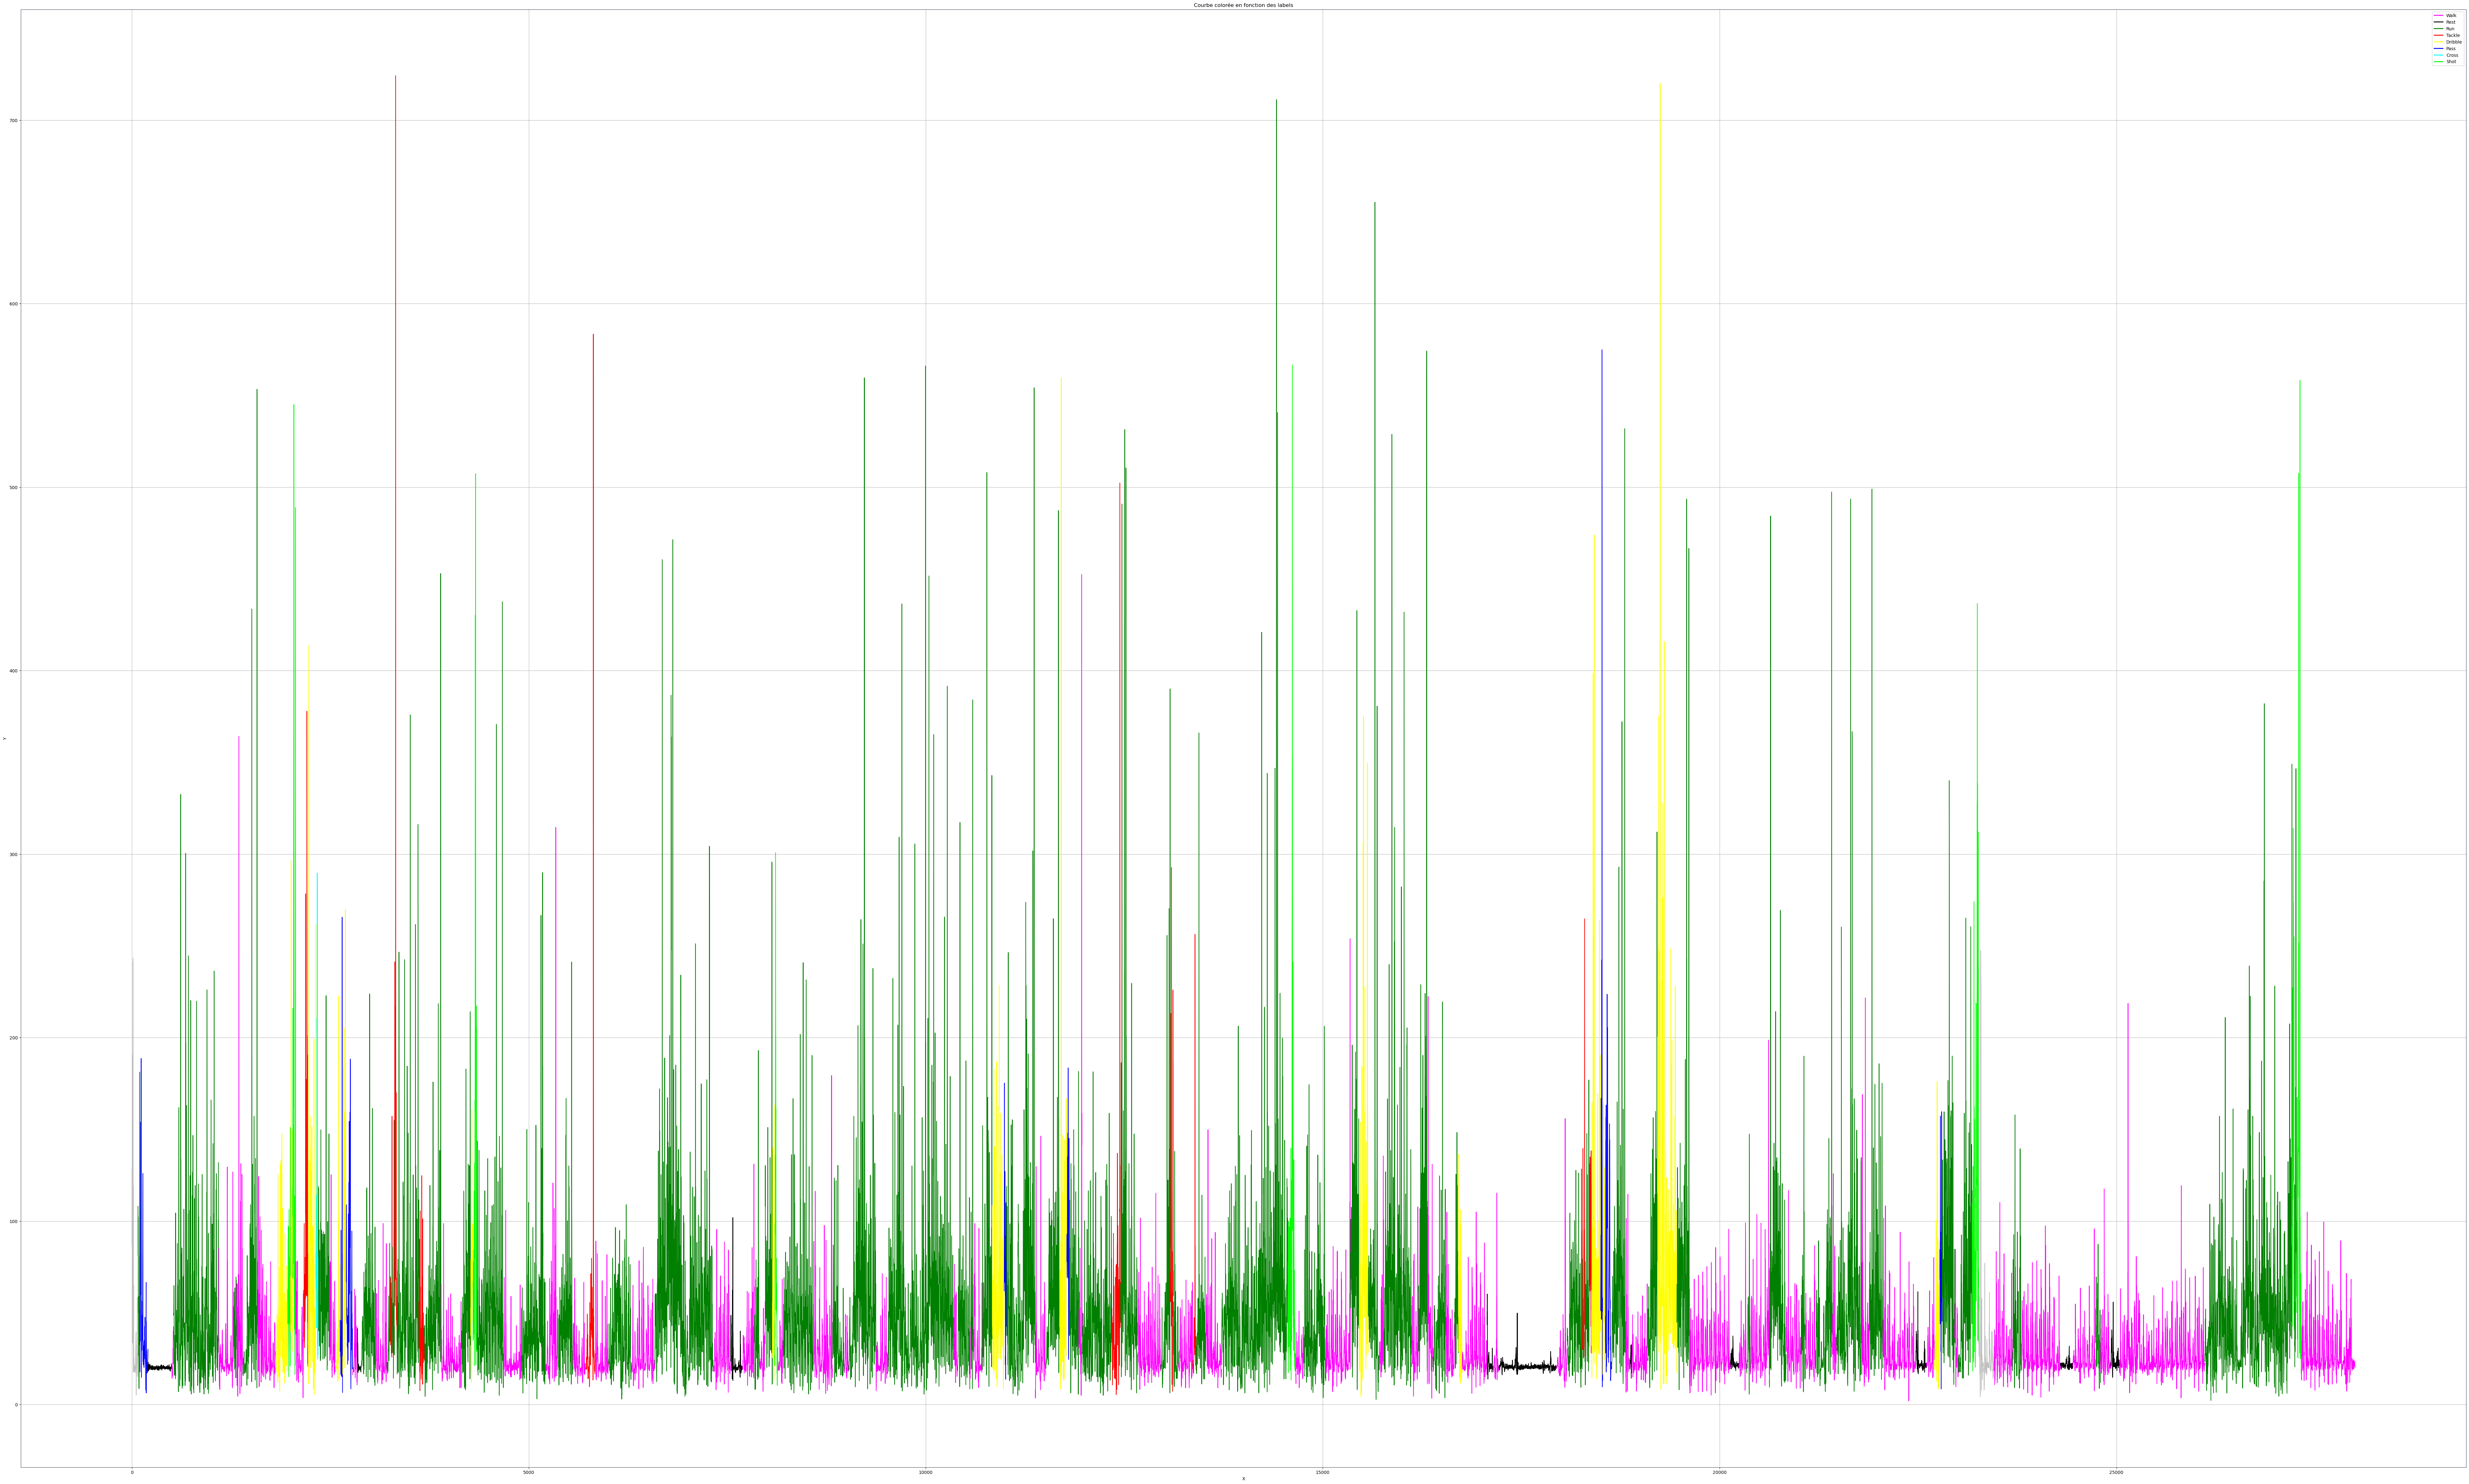

In [19]:
x = Game_2.index
y = Game_2['norm']
labels = Game_2['label']

# Création de la figure et du graphe
plt.figure(figsize=(100, 60))

# Définition des couleurs correspondantes aux labels
colors = ['fuchsia', 'black', 'green', 'red', 'yellow', 'blue', 'cyan', 'lime', 'silver']

# Tracer la courbe en colorant en fonction des labels
current_label = labels[0]
current_segment_start = 0

for i in range(1, len(x)):
    if labels[i] != current_label:
        plt.plot(x[current_segment_start:i], y[current_segment_start:i], color=colors[current_label], label=f'Label {current_label}')
        current_label = labels[i]
        current_segment_start = i

legend_elements = [
    Line2D([0], [0], color='fuchsia', lw=2, label='Walk'),
    Line2D([0], [0], color='black', lw=2, label='Rest'),
    Line2D([0], [0], color='green', lw=2, label='Run'),
    Line2D([0], [0], color='red', lw=2, label='Tackle'),
    Line2D([0], [0], color='yellow', lw=2, label='Dribble'),
    Line2D([0], [0], color='blue', lw=2, label='Pass'),
    Line2D([0], [0], color='cyan', lw=2, label='Cross'),
    Line2D([0], [0], color='lime', lw=2, label='Shot'),
]

# Tracer le dernier segment
plt.plot(x[current_segment_start:], y[current_segment_start:], color=colors[current_label], label=f'Label {current_label}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Courbe colorée en fonction des labels')
plt.legend(handles=legend_elements)
plt.grid(True)
plt.show()

4 random graphs for the action: walk
---------------------------------------------


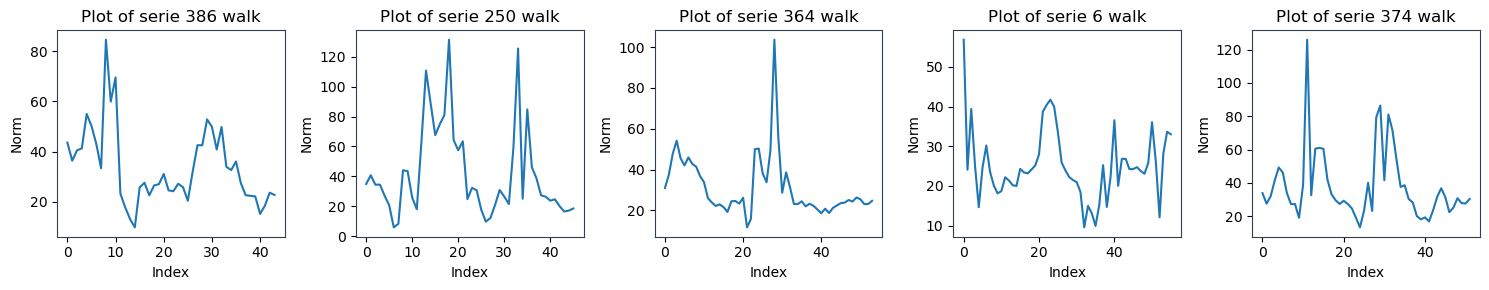

4 random graphs for the action: rest
---------------------------------------------


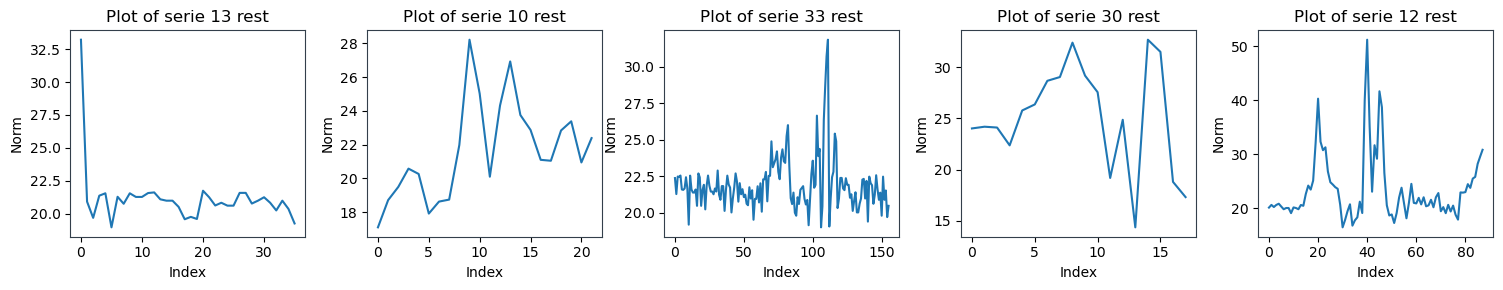

4 random graphs for the action: run
---------------------------------------------


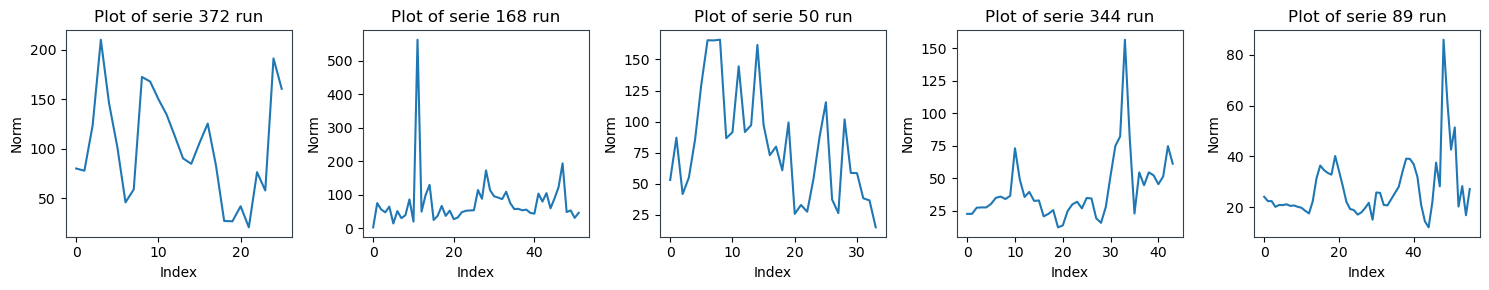

4 random graphs for the action: tackle
---------------------------------------------


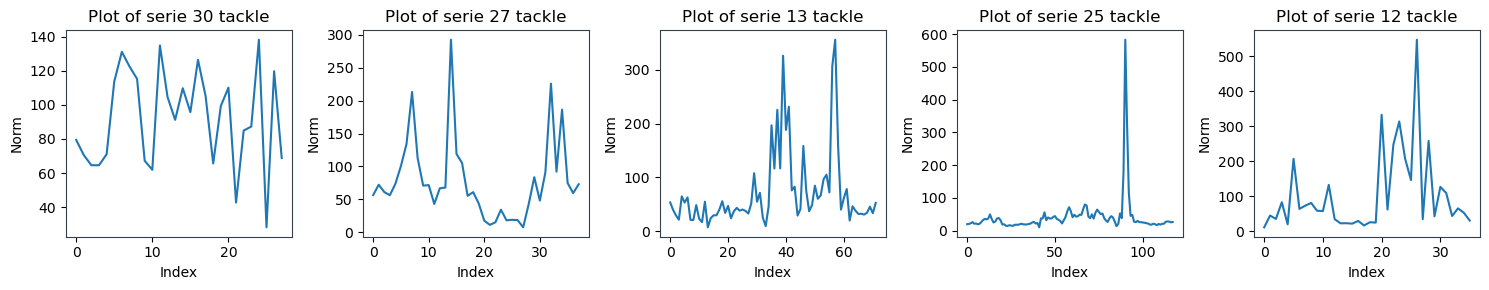

4 random graphs for the action: dribble
---------------------------------------------


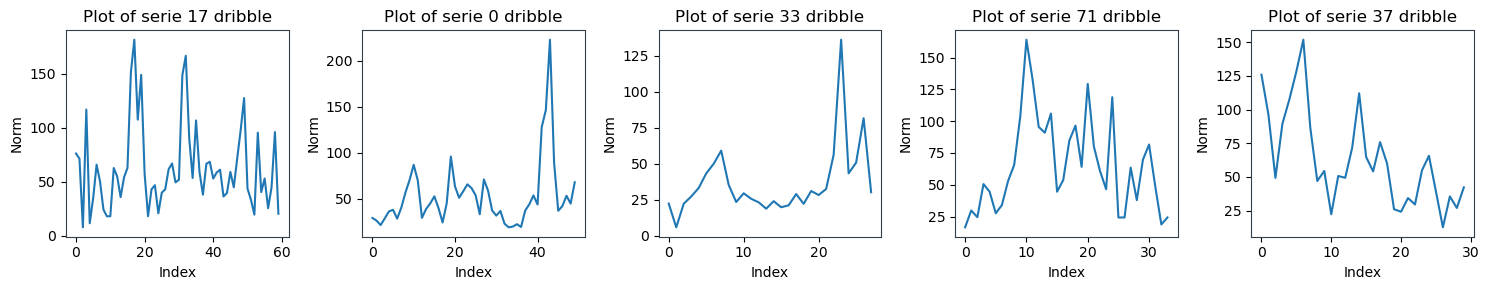

4 random graphs for the action: pass
---------------------------------------------


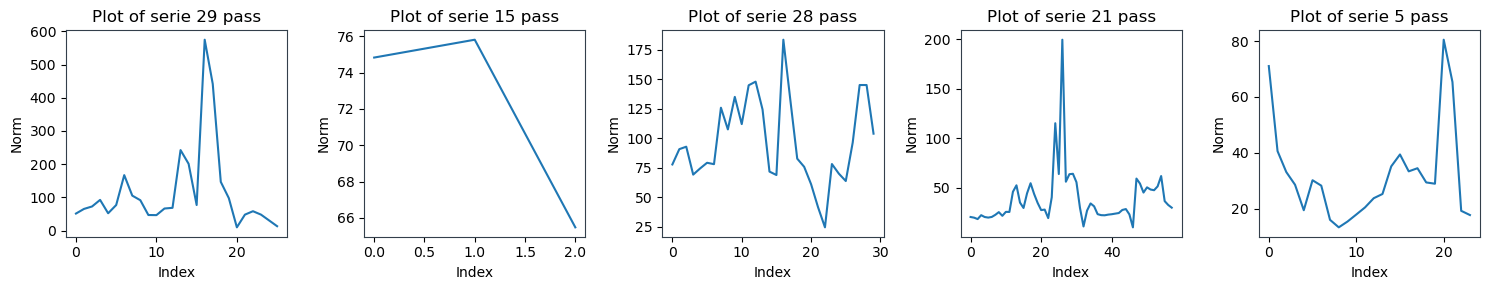

4 random graphs for the action: cross
---------------------------------------------


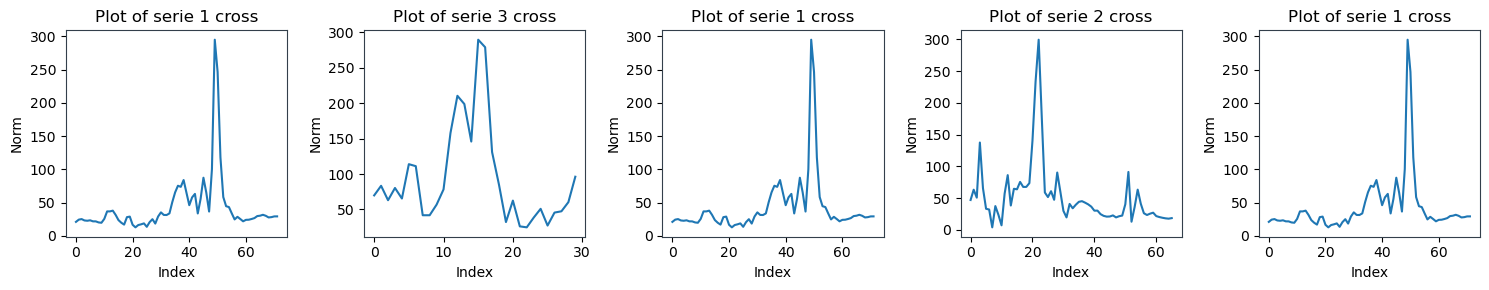

4 random graphs for the action: shot
---------------------------------------------


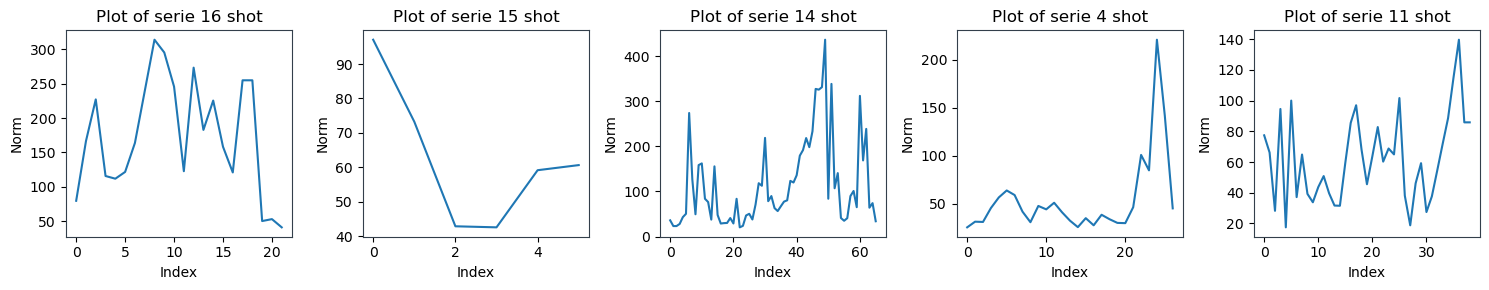

In [20]:
for label in ['walk', 'rest', 'run', 'tackle', 'dribble', 'pass', 'cross', 'shot']:
    print('4 random graphs for the action: ' + label)
    print('---------------------------------------------')

    # Create a figure with 5 subplots (1 row, 5 columns)
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    selected_indices = []
    for i in range(5):  # Generate 5 random plots
        # Generate a random index that is not in the selected_indices list
        while True:
            rand_int = np.random.randint(len(full_df[full_df['label'] == label]))
            if label == 'cross': #exception for cross that only have 4 apparitions
                break
            if rand_int not in selected_indices:
                selected_indices.append(rand_int)
                break

        # Create a line plot on the i-th subplot
        sns.lineplot(
            x=range(len(full_df[full_df['label'] == label]['norm'].iloc[rand_int])),
            y=full_df[full_df['label'] == label]['norm'].iloc[rand_int],
            ax=axes[i]  # Use the i-th subplot
        )

        # Add labels and a title to the subplot
        axes[i].set_xlabel('Index')
        axes[i].set_ylabel('Norm')
        axes[i].set_title('Plot of serie ' + str(rand_int) + ' ' + label)

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the subplots
    plt.show()

In [15]:
def find_max_position(series):
    max_value = max(series)
    max_position = series.index(max_value)
    return max_position

def find_max_proportion(series):
    max_proportion = series.index(max(series))/len(series)
    return max_proportion

In [16]:
for label in ['walk', 'rest', 'run', 'tackle', 'dribble', 'pass', 'cross', 'shot']:

    pos_max = full_df[full_df['label']==label]['norm'].apply(lambda x : find_max_position(x))
    prop_max = full_df[full_df['label']==label]['norm'].apply(lambda x : find_max_proportion(x))

    mean, median, std, percentile_95, max_val, min_val = calculate_statistics(prop_max)

    print("STATISTICS FOR THE ACTION : ", label)
    print("Mean:", mean)
    print("Median:", median)
    print("Standard Deviation:", std)
    print("95th Percentile:", percentile_95)
    print("Max :", max_val)
    print("Min :", min_val)
    print("--------------------")

STATISTICS FOR THE ACTION :  walk
Mean: 0.6169600852593682
Median: 0.671875
Standard Deviation: 0.2274182561852029
95th Percentile: 0.9090909090909091
Max : 0.9861111111111112
Min : 0.0
--------------------
STATISTICS FOR THE ACTION :  rest
Mean: 0.4587779982926146
Median: 0.4189189189189189
Standard Deviation: 0.3063166892780857
95th Percentile: 0.8691570881226054
Max : 0.95
Min : 0.0
--------------------
STATISTICS FOR THE ACTION :  run
Mean: 0.6185916209878667
Median: 0.719375
Standard Deviation: 0.274145306838321
95th Percentile: 0.9285714285714286
Max : 0.9833333333333333
Min : 0.0
--------------------
STATISTICS FOR THE ACTION :  tackle
Mean: 0.646018512094355
Median: 0.6923076923076923
Standard Deviation: 0.22209944674799062
95th Percentile: 0.8965909090909091
Max : 0.9230769230769231
Min : 0.043478260869565216
--------------------
STATISTICS FOR THE ACTION :  dribble
Mean: 0.5904038252726083
Median: 0.6927083333333333
Standard Deviation: 0.3025204981259003
95th Percentile: 0.93

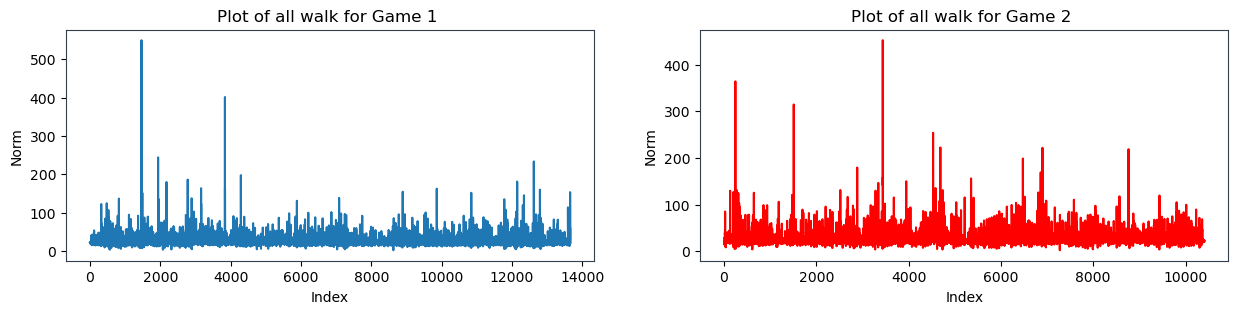

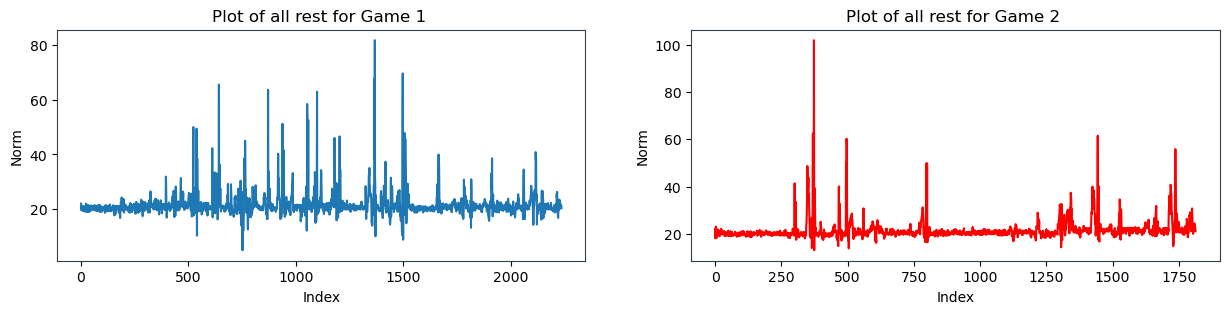

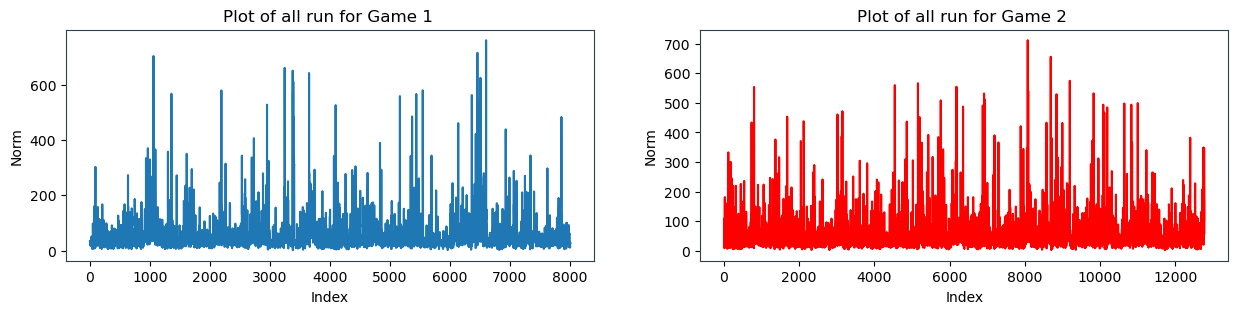

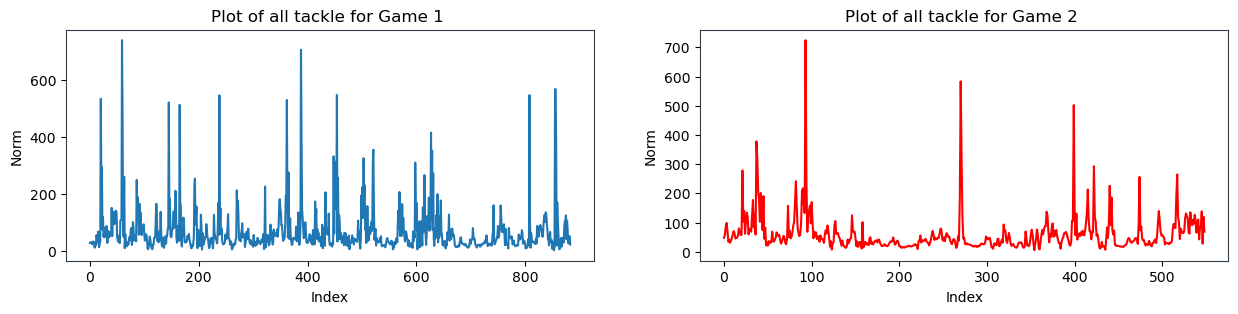

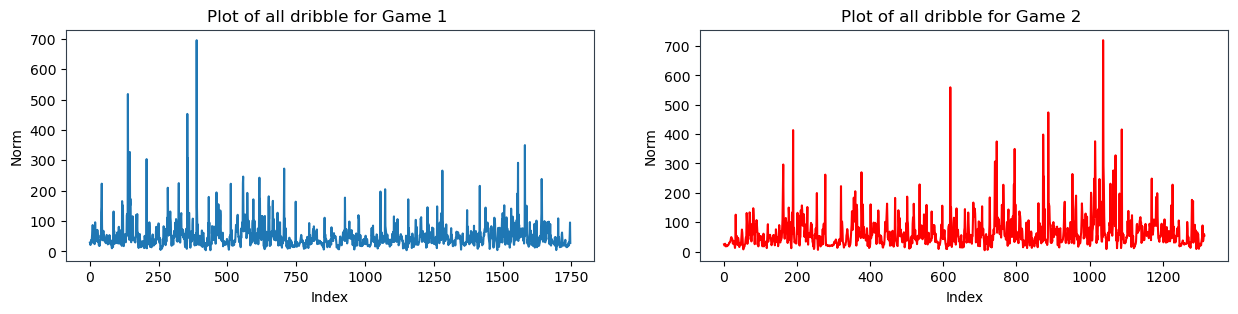

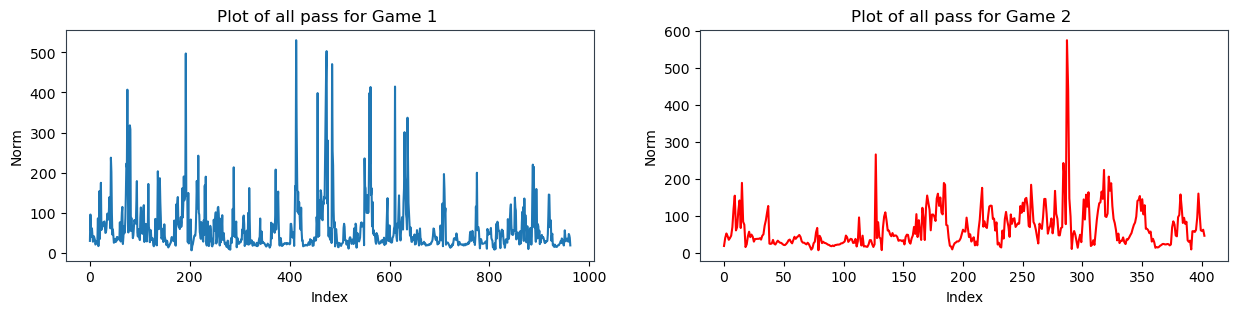

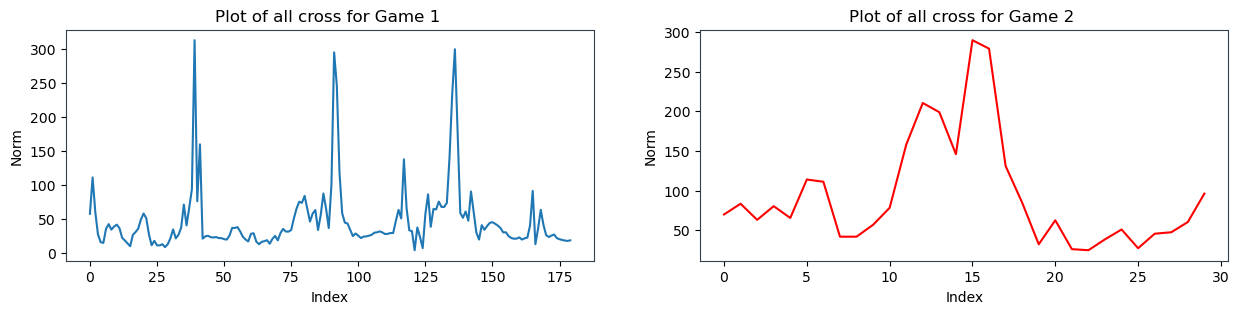

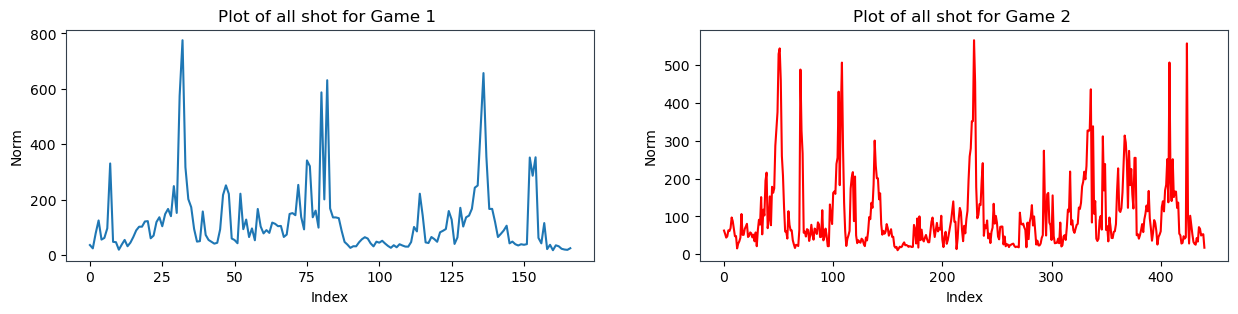

In [23]:
for i in range(8):
    fig, axes = plt.subplots(1, 2, figsize=(15, 3))
    sns.lineplot(
         x=range(len(Game_1[Game_1['label']==i]['norm'])), 
         y=Game_1[Game_1['label']==i]['norm'],
         ax=axes[0])
    sns.lineplot(
         x=range(len(Game_2[Game_2['label']==i]['norm'])), 
         y=Game_2[Game_2['label']==i]['norm'],
         color='r',
         ax=axes[1])
    # Add labels and a title to the subplot
    axes[0].set_xlabel('Index')
    axes[0].set_ylabel('Norm')
    axes[0].set_title('Plot of all ' + ['walk', 'rest', 'run', 'tackle', 'dribble', 'pass', 'cross', 'shot'][i] + ' for Game 1 ')

    axes[1].set_xlabel('Index')
    axes[1].set_ylabel('Norm')
    axes[1].set_title('Plot of all ' + ['walk', 'rest', 'run', 'tackle', 'dribble', 'pass', 'cross', 'shot'][i] + ' for Game 2 ')



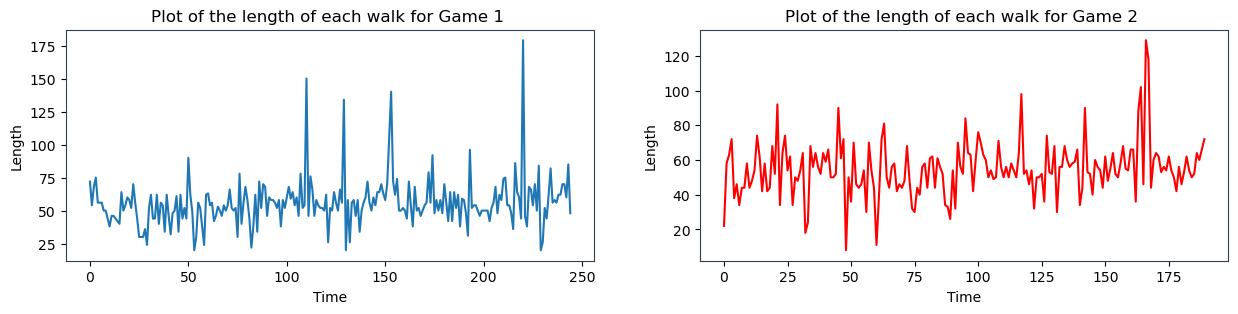

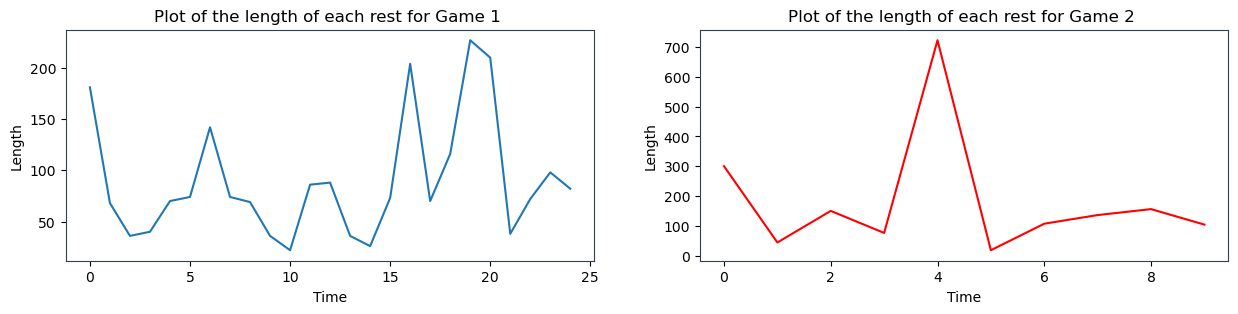

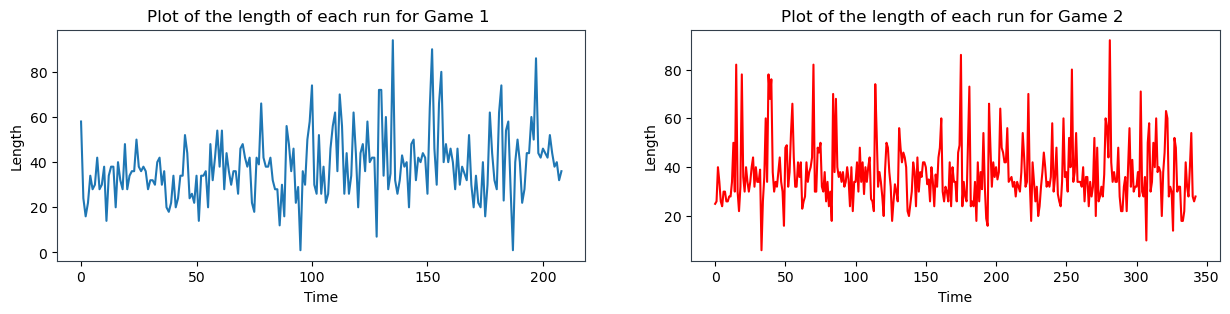

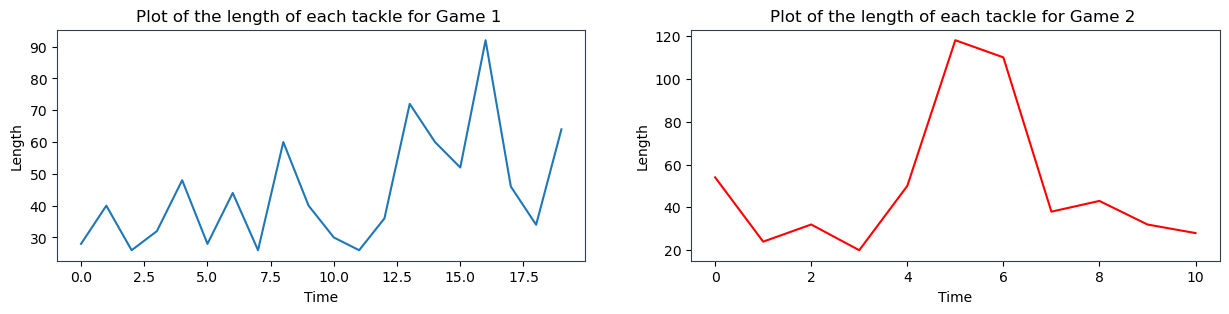

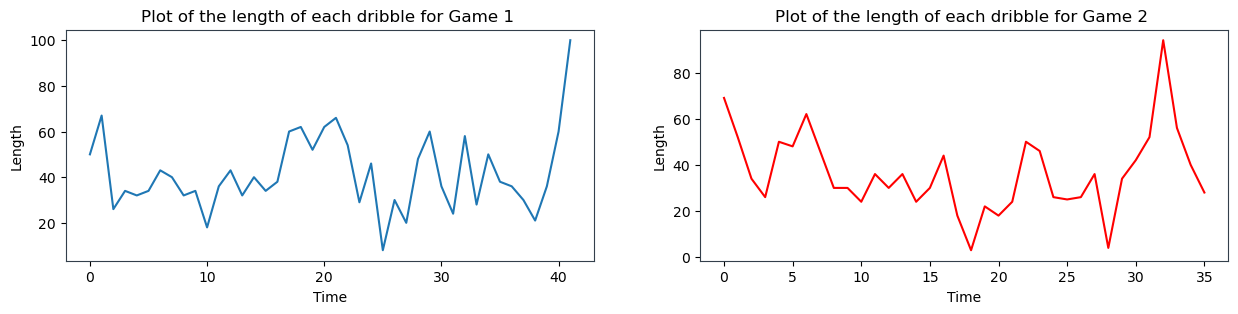

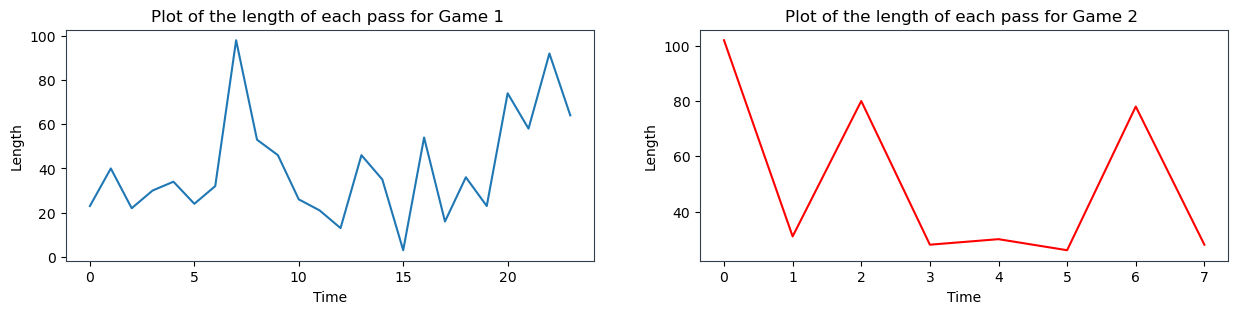

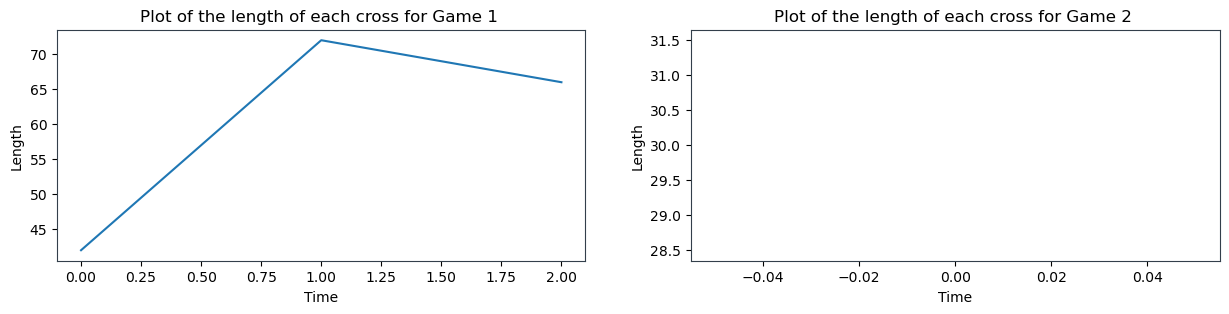

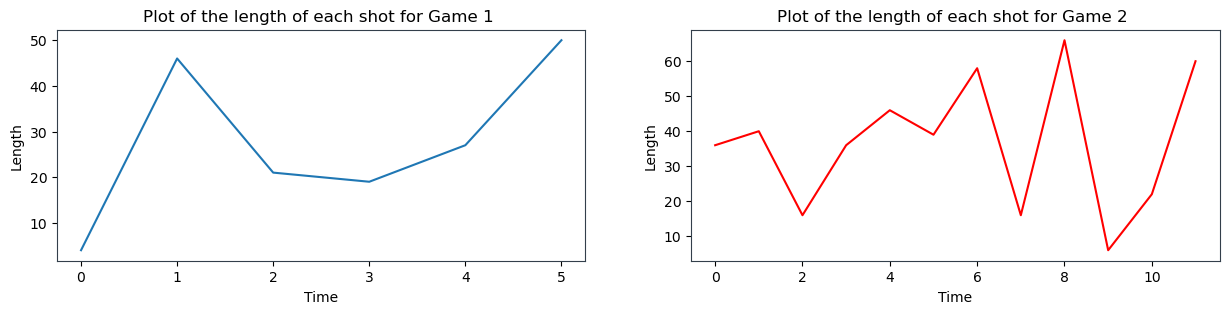

In [24]:
for label in ['walk', 'rest', 'run', 'tackle', 'dribble', 'pass', 'cross', 'shot']:
    fig, axes = plt.subplots(1, 2, figsize=(15, 3))
    sns.lineplot(
         x=range(len(df[df['label']==label]['longueur'])), 
         y=df[df['label']==label]['longueur'],
         ax=axes[0])
    sns.lineplot(
         x=range(len(df2[df2['label']==label]['longueur'])), 
         y=df2[df2['label']==label]['longueur'],
         color='r',
         ax=axes[1])
    # Add labels and a title to the subplot
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('Length')
    axes[0].set_title('Plot of the length of each ' + label + ' for Game 1 ')

    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('Length')
    axes[1].set_title('Plot of the length of each ' + label + ' for Game 2 ')


In [18]:
def combine_lists(list1, list2):
    if len(list1) >= 5 and len(list2) >= 5:
        return list1[-5:] + list2[:5]
    elif len(list1) < 5 and len(list2) >= 5:
        return list1 + list2[:5 - len(list1)]
    elif len(list1) >= 5 and len(list2) < 5:
        return list1[-5 + len(list2):] + list2
    else:  # Both lists have fewer than 5 elements
        return list1 + list2

In [19]:
trans = []
From = df['label'][:-1].reset_index(drop=True)
To = df['label'][1:].reset_index(drop=True)
for i in range(1, len(df)):
    list1 = df['norm'].iloc[i-1]
    list2 = df['norm'].iloc[i]
    combined_list = combine_lists(list1, list2)
    trans.append(combined_list)
Transi_Game_1 = pd.DataFrame({'Action From': From, 'Action To': To, 'Serie trans': trans})
Transi_Game_1 = Transi_Game_1[Transi_Game_1['Serie trans'].apply(lambda x: len(x) == 10)].reset_index(drop=True)

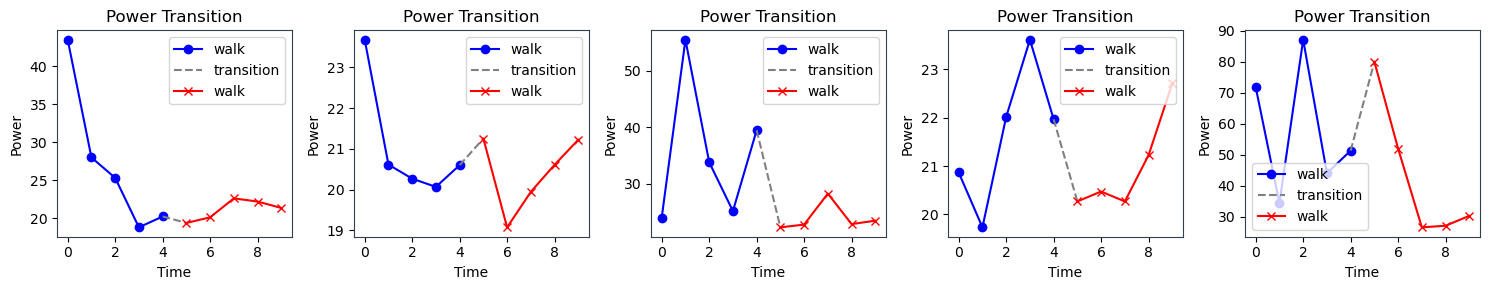

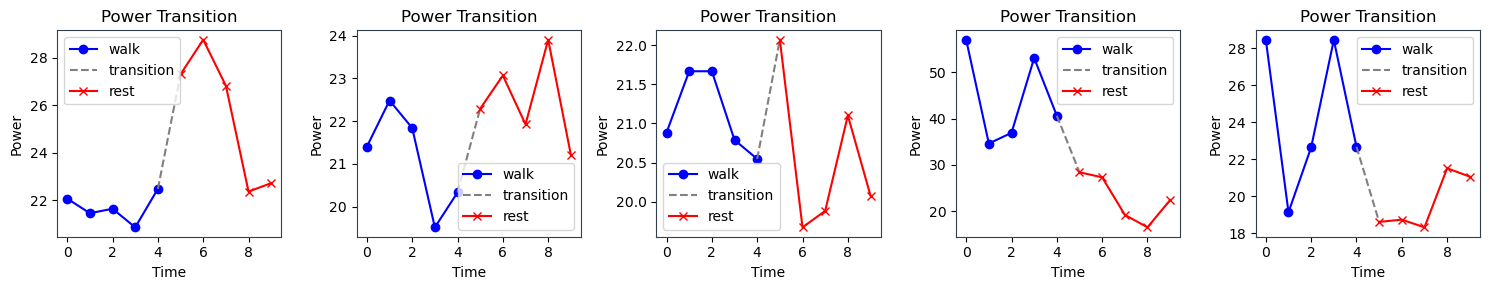

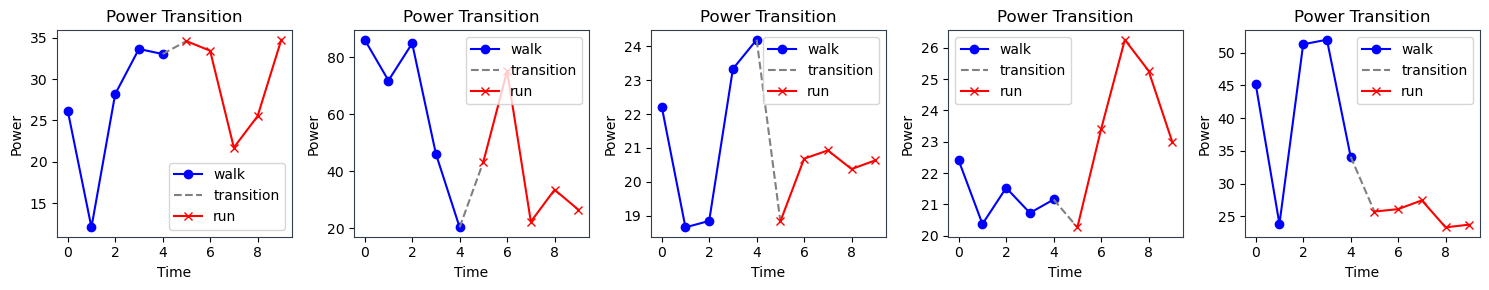

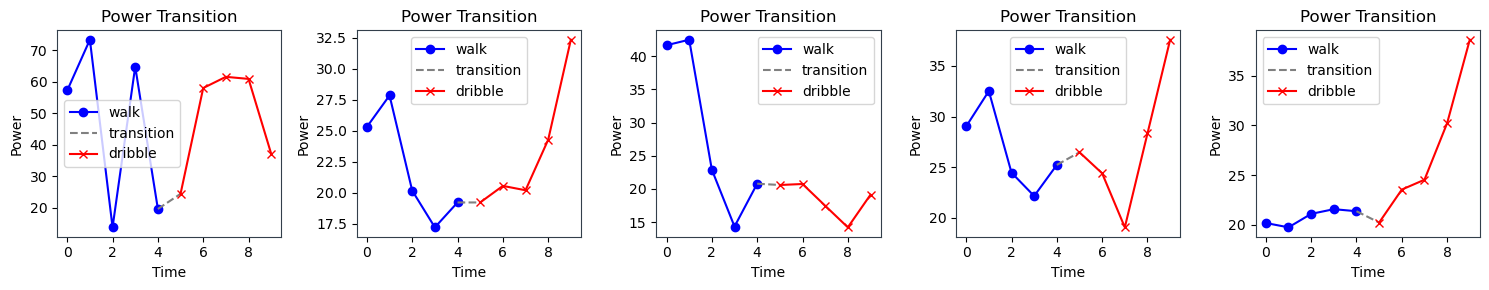

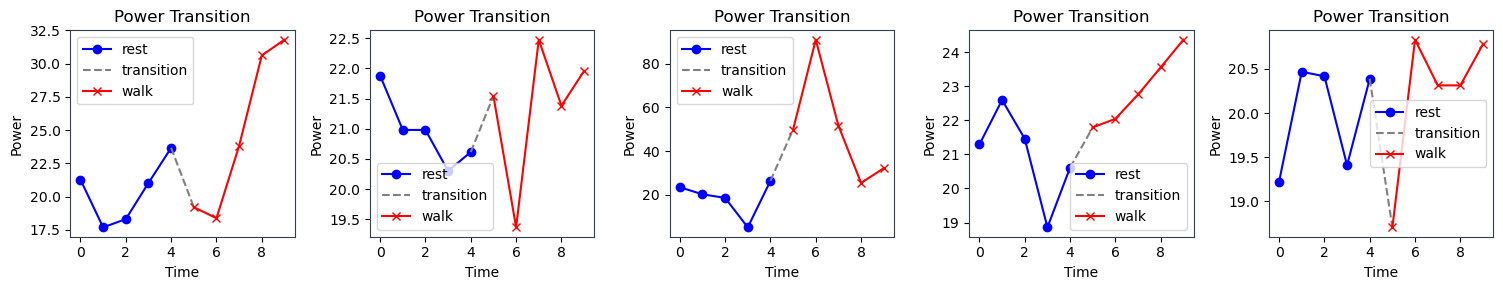

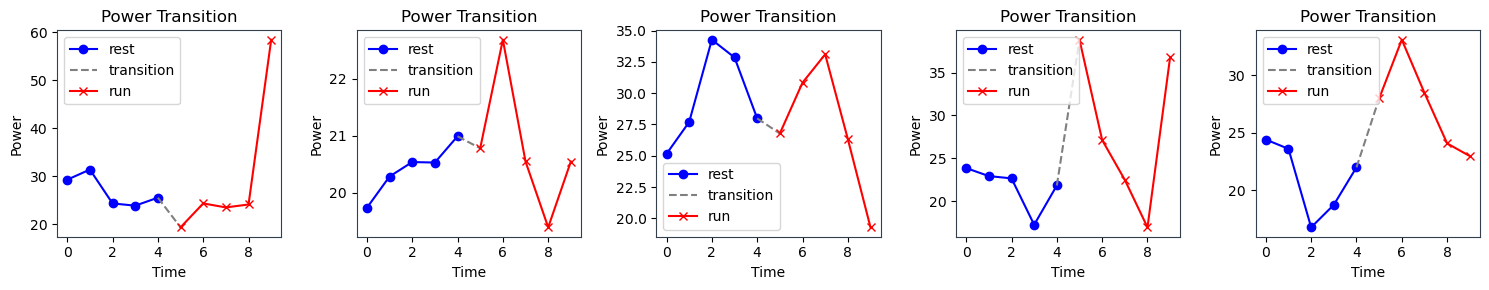

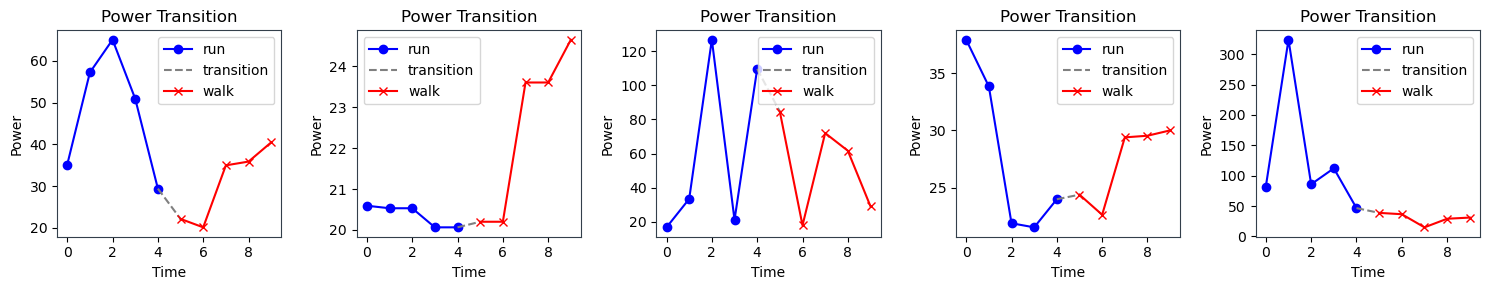

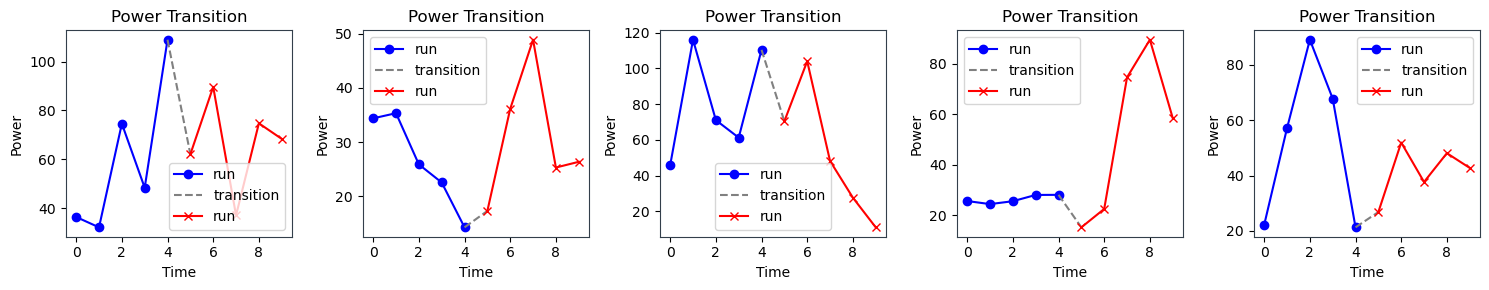

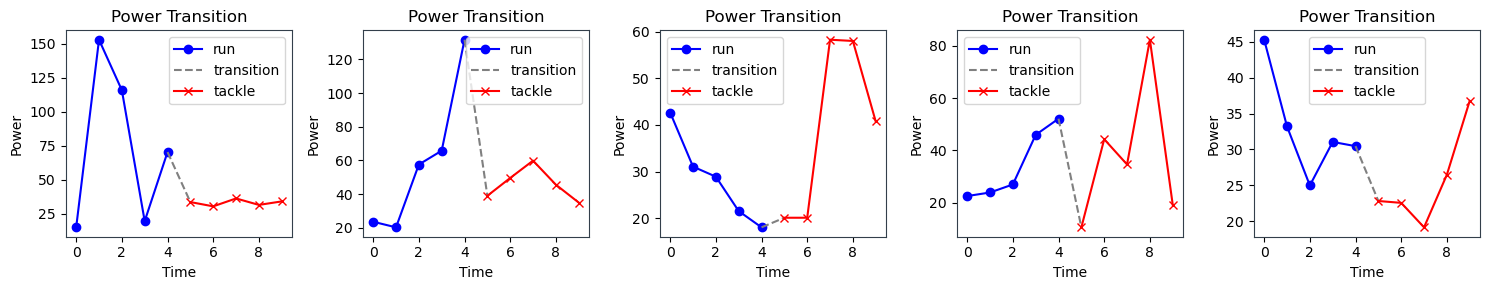

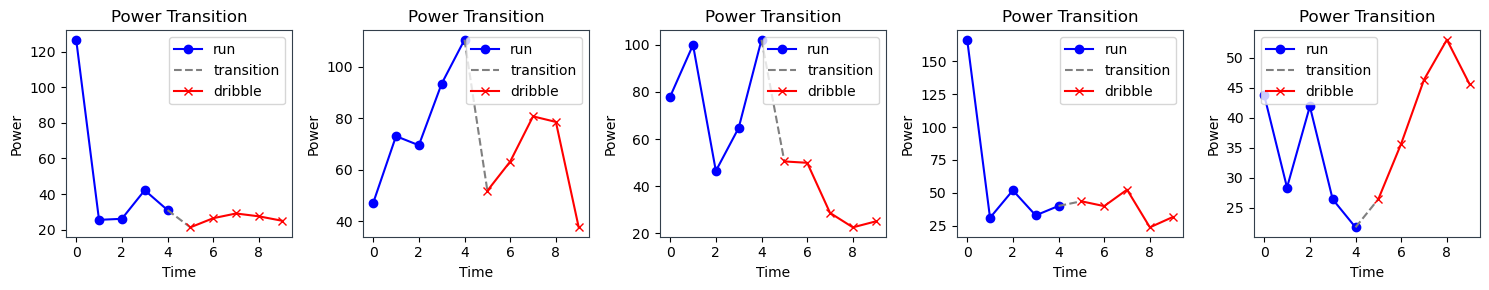

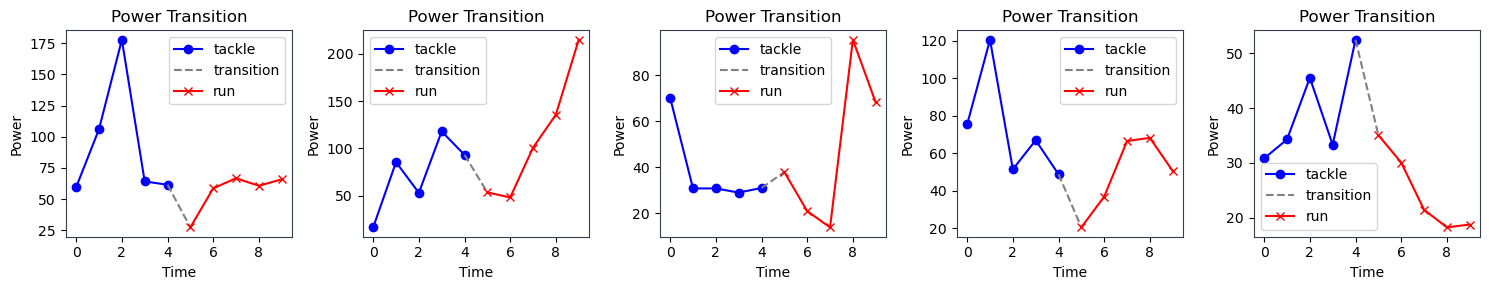

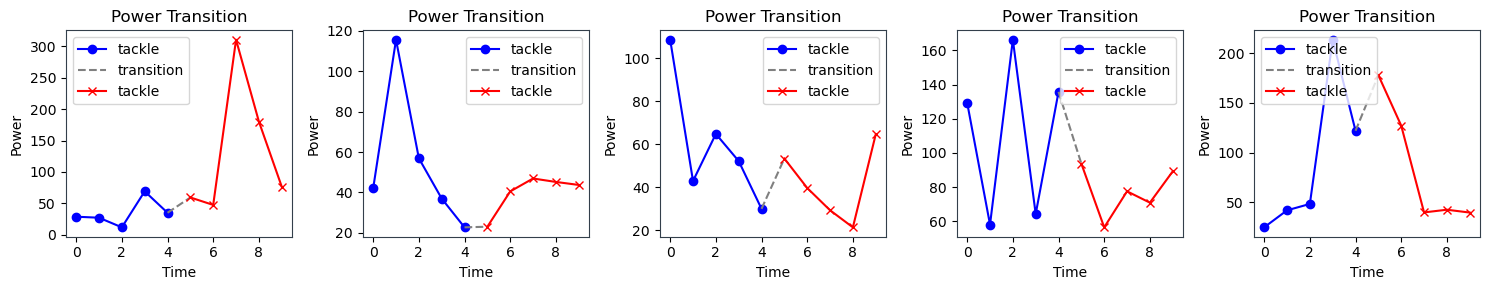

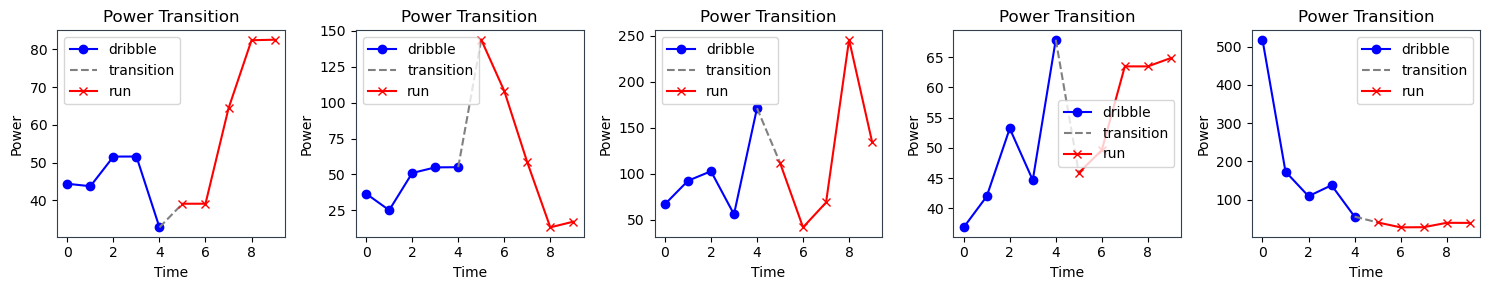

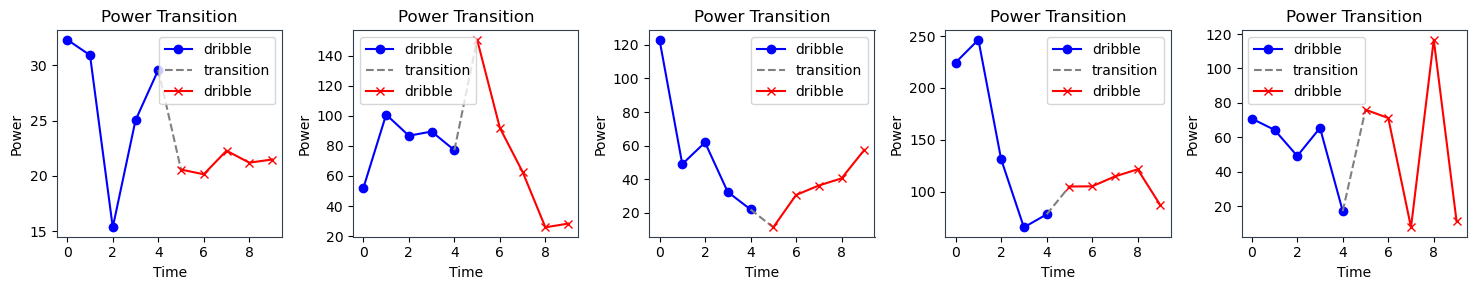

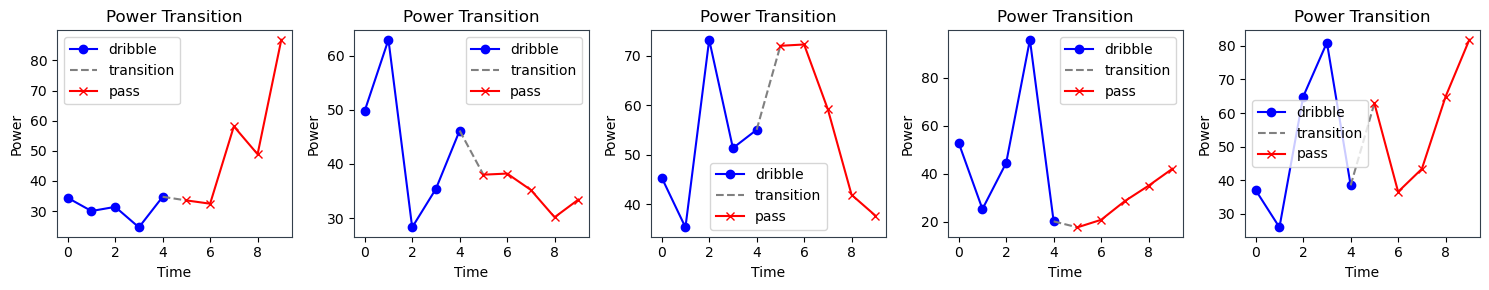

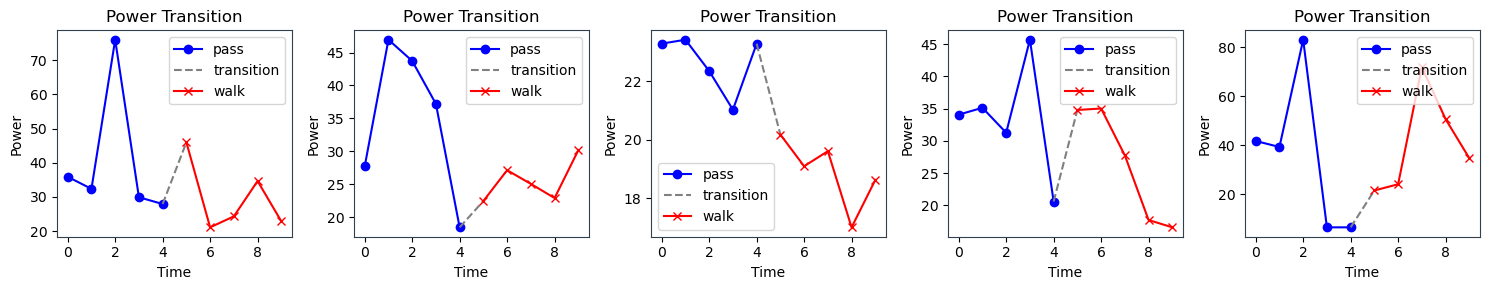

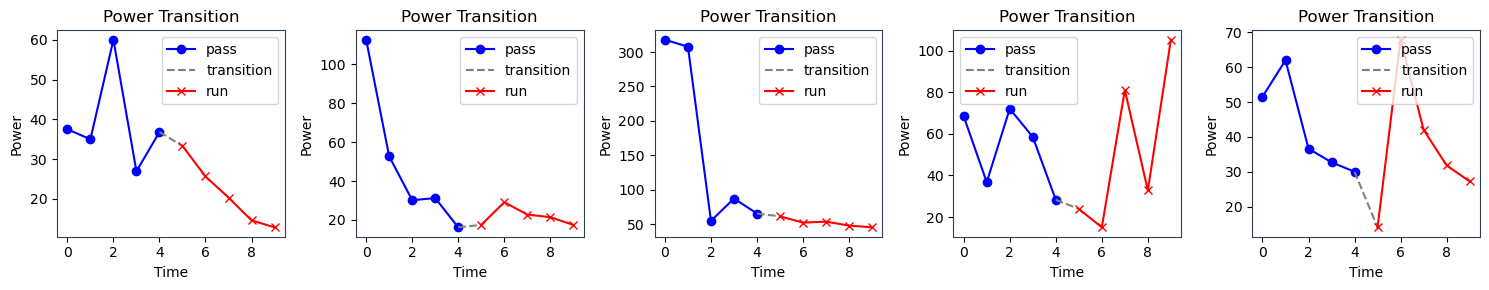

In [20]:
action_indices = {}

for action1 in ['walk', 'rest', 'run', 'tackle', 'dribble', 'pass', 'cross', 'shot']:
    for action2 in ['walk', 'rest', 'run', 'tackle', 'dribble', 'pass', 'cross', 'shot']:
        if len(Transi_Game_1[(Transi_Game_1['Action From'] == action1) & (Transi_Game_1['Action To'] == action2)]) >= 5:
            action_indices[(action1, action2)] = np.random.choice(
                Transi_Game_1[(Transi_Game_1['Action From'] == action1) & (Transi_Game_1['Action To'] == action2)].index,
                size=5,
                replace=False
            )

for (action1, action2), indices in action_indices.items():
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))

    for i, idx in enumerate(indices):
        serie = Transi_Game_1.loc[idx, 'Serie trans']

        axes[i].plot(np.arange(0, 5), serie[:5], color='b', marker='o', linestyle='-', label=action1)
        axes[i].plot(np.arange(4, 6), serie[4:6], color='grey', linestyle='--', label='transition')
        axes[i].plot(np.arange(5, 10), serie[5:], color='r', marker='x', linestyle='-', label=action2)

        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Power')
        axes[i].set_title('Power Transition')
        axes[i].legend()

    plt.tight_layout()
    plt.show()

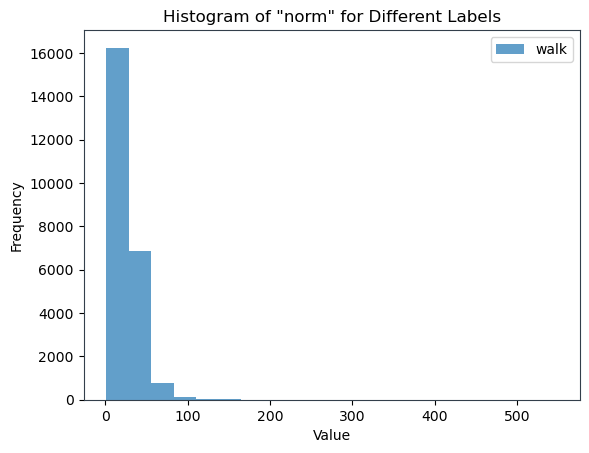

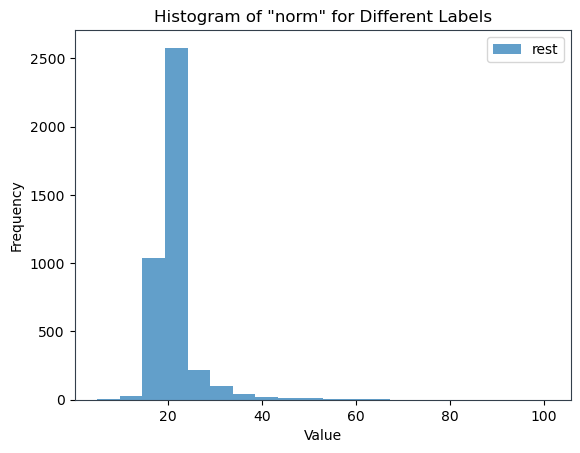

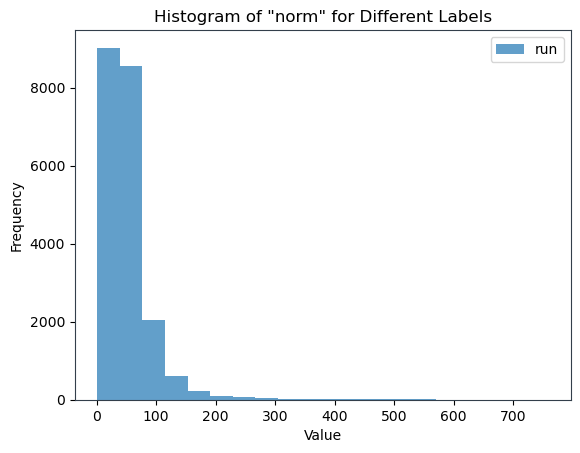

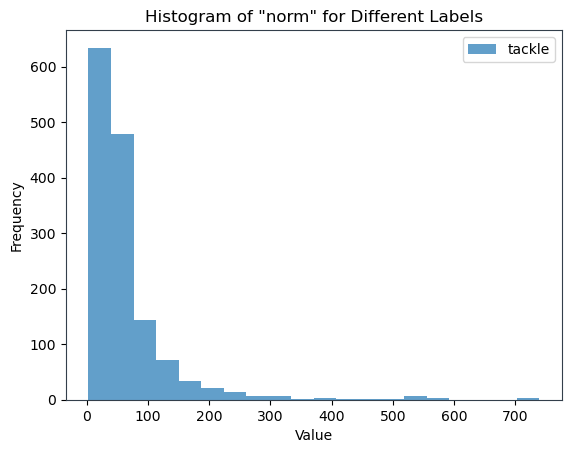

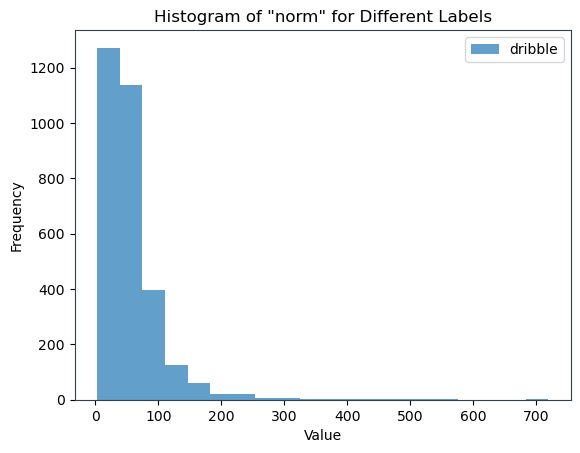

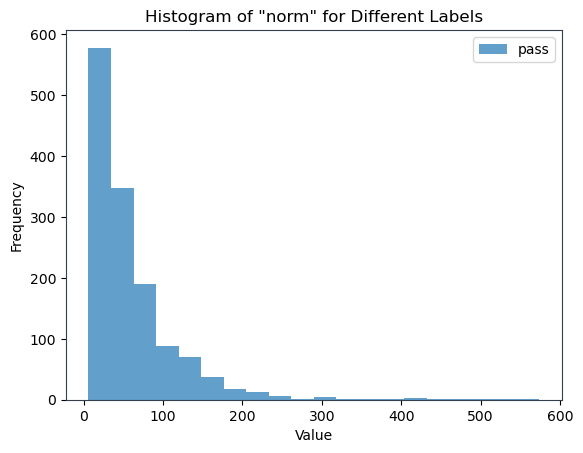

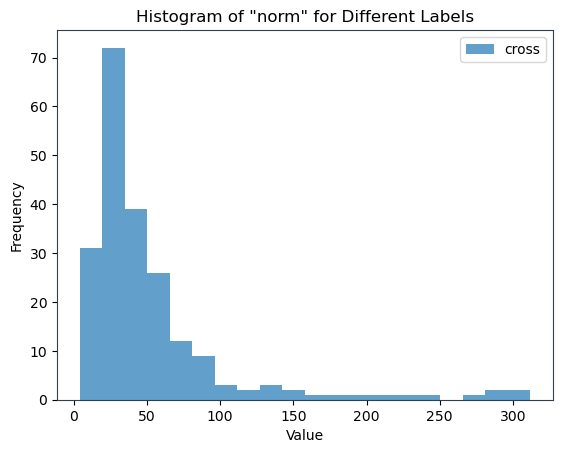

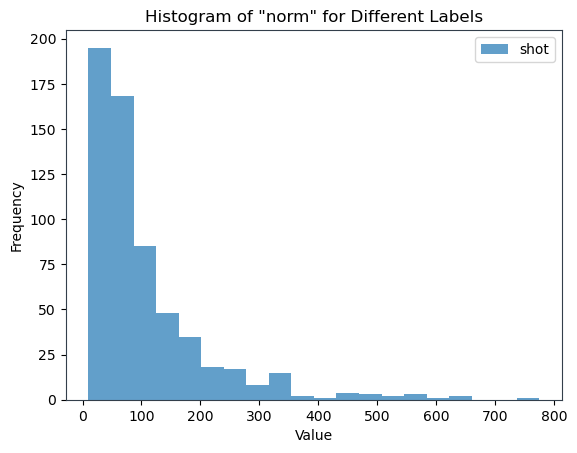

In [28]:
for label in ['walk', 'rest', 'run', 'tackle', 'dribble', 'pass', 'cross', 'shot']:
    data = full_df[full_df['label'] == label]['norm'].explode().apply(lambda x: int(x))
    
    # Plot a histogram
    plt.hist(data, bins=20, alpha=0.7, label=label)  # Adjust the number of bins as needed

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Histogram of "norm" for Different Labels')
    plt.show()

In [ ]:
def get_transition(full_df):
    
    labels_game = full_df.label
    label_data = {}
    # Count occurrences and followed counts
    for i in range(len(labels_game) - 1):
        current_label = labels_game[i]
        next_label = labels_game[i + 1]
        
        if current_label not in label_data:
            label_data[current_label] = {'total': 0, 'followed': {}}
        
        label_data[current_label]['total'] += 1
        
        if next_label not in label_data[current_label]['followed']:
            label_data[current_label]['followed'][next_label] = 0
        
        label_data[current_label]['followed'][next_label] += 1




    # Convert the nested dictionary into a DataFrame
    data_for_df = {}


    for label, data in label_data.items():
        percentages = {followed_label: (followed_count / data['total']) if data['total'] > 0 else 0
                    for followed_label, followed_count in data['followed'].items()}
        data_for_df[label] = percentages

    df_per = pd.DataFrame(data_for_df).fillna(0).T
    return df_per

In [181]:
labels_game = full_df.label
label_data = {}
# Count occurrences and followed counts
for i in range(len(labels_game) - 1):
    current_label = labels_game[i]
    next_label = labels_game[i + 1]
    
    if current_label not in label_data:
        label_data[current_label] = {'total': 0, 'followed': {}}
    
    label_data[current_label]['total'] += 1
    
    if next_label not in label_data[current_label]['followed']:
        label_data[current_label]['followed'][next_label] = 0
    
    label_data[current_label]['followed'][next_label] += 1




# Convert the nested dictionary into a DataFrame
data_for_df = {}


for label, data in label_data.items():
    percentages = {followed_label: (followed_count / data['total']) if data['total'] > 0 else 0
                for followed_label, followed_count in data['followed'].items()}
    data_for_df[label] = percentages

df_per = pd.DataFrame(data_for_df).fillna(0).T






# Convert transposed DataFrame to tabular format
tabulated_output_1 = tabulate.tabulate(df_per, headers='keys', tablefmt='pretty')

# Print the tabulated output
print(tabulated_output_1)


+-----------+----------------------+----------------------+---------------------+----------------------+----------------------+----------------------+----------------------+-----------------------+----------------------+
|           |         walk         |         rest         |         run         |        tackle        |       dribble        |         pass         |         shot         |       no action       |        cross         |
+-----------+----------------------+----------------------+---------------------+----------------------+----------------------+----------------------+----------------------+-----------------------+----------------------+
|   walk    |  0.7327188940092166  | 0.06221198156682028  | 0.17050691244239632 | 0.01152073732718894  | 0.018433179723502304 | 0.004608294930875576 |         0.0          |          0.0          |         0.0          |
|   rest    |         0.8          |         0.0          | 0.17142857142857143 |         0.0          |         0.0

In [182]:
df_per

walk      rest       run    tackle   dribble      pass  \
walk       0.732719  0.062212  0.170507  0.011521  0.018433  0.004608   
rest       0.800000  0.000000  0.171429  0.000000  0.000000  0.028571   
run        0.112319  0.007246  0.786232  0.034420  0.039855  0.009058   
tackle     0.161290  0.000000  0.483871  0.225806  0.129032  0.000000   
dribble    0.038462  0.000000  0.102564  0.000000  0.500000  0.230769   
pass       0.312500  0.093750  0.281250  0.000000  0.125000  0.156250   
cross      0.250000  0.250000  0.250000  0.000000  0.000000  0.250000   
shot       0.333333  0.000000  0.222222  0.000000  0.055556  0.000000   
no action  0.500000  0.000000  0.500000  0.000000  0.000000  0.000000   

               shot  no action     cross  
walk       0.000000   0.000000  0.000000  
rest       0.000000   0.000000  0.000000  
run        0.009058   0.001812  0.000000  
tackle     0.000000   0.000000  0.000000  
dribble    0.089744   0.000000  0.038462  
pass       0.000000   0.000000  0.031250  
cross      0.000000   0.000000  0.000000  
shot       0.333333   0.055556  0.000000  
no action  0.000000   0.000000  0.000000

In [183]:
def Del_no_action(df_per)
    for columns in df_per.columns:
        if df_per['no action'][columns]!=0:
            df_per['walk'][columns] = df_per['walk'][columns] + df_per['no action'][columns]
    df_per = df_per.drop('no action', axis=0)  # Drop row
    df_per = df_per.drop('no action', axis=1)  # Drop column
    return df_per

In [184]:
df_per

walk      rest       run    tackle   dribble      pass      shot  \
walk     0.732719  0.062212  0.170507  0.011521  0.018433  0.004608  0.000000   
rest     0.800000  0.000000  0.171429  0.000000  0.000000  0.028571  0.000000   
run      0.114130  0.007246  0.786232  0.034420  0.039855  0.009058  0.009058   
tackle   0.161290  0.000000  0.483871  0.225806  0.129032  0.000000  0.000000   
dribble  0.038462  0.000000  0.102564  0.000000  0.500000  0.230769  0.089744   
pass     0.312500  0.093750  0.281250  0.000000  0.125000  0.156250  0.000000   
cross    0.250000  0.250000  0.250000  0.000000  0.000000  0.250000  0.000000   
shot     0.388889  0.000000  0.222222  0.000000  0.055556  0.000000  0.333333   

            cross  
walk     0.000000  
rest     0.000000  
run      0.000000  
tackle   0.000000  
dribble  0.038462  
pass     0.031250  
cross    0.000000  
shot     0.000000

In [21]:
# Drop the "no action" row and column
df_per = df_per.drop('no action', axis=0)  # Drop row
df_per = df_per.drop('no action', axis=1)  # Drop column
df_per['walk']['run'] = df_per['walk']['run'] + 0.0018115942028985507
df_per['walk']['shot'] = df_per['walk']['shot'] + 0.05555555555555555

In [117]:
df_per

walk      rest       run    tackle   dribble      pass      shot  \
walk     0.732719  0.062212  0.170507  0.011521  0.018433  0.004608  0.000000   
rest     0.800000  0.000000  0.171429  0.000000  0.000000  0.028571  0.000000   
run      0.114130  0.007246  0.786232  0.034420  0.039855  0.009058  0.009058   
tackle   0.161290  0.000000  0.483871  0.225806  0.129032  0.000000  0.000000   
dribble  0.038462  0.000000  0.102564  0.000000  0.500000  0.230769  0.089744   
pass     0.312500  0.093750  0.281250  0.000000  0.125000  0.156250  0.000000   
cross    0.250000  0.250000  0.250000  0.000000  0.000000  0.250000  0.000000   
shot     0.388889  0.000000  0.222222  0.000000  0.055556  0.000000  0.333333   

            cross  
walk     0.000000  
rest     0.000000  
run      0.000000  
tackle   0.000000  
dribble  0.038462  
pass     0.031250  
cross    0.000000  
shot     0.000000

In [120]:
transition_matrix = {
    'walk': [0.732719, 0.062212, 0.170507, 0.011521, 0.018433, 0.004608, 0.000000, 0.000000],
    'rest': [0.800000, 0.000000, 0.171429, 0.000000, 0.000000, 0.028571, 0.000000, 0.000000],
    'run': [0.114130, 0.007246, 0.786233, 0.034420, 0.039855, 0.009058, 0.009058, 0.000000],
    'tackle': [0.161290, 0.000000, 0.483872, 0.225806, 0.129032, 0.000000, 0.000000, 0.000000],
    'dribble': [0.038462, 0.000000, 0.102563, 0.000000, 0.500000, 0.230769, 0.089744, 0.038462],
    'pass': [0.312500, 0.093750, 0.281250, 0.000000, 0.125000, 0.156250, 0.000000, 0.031250],
    'cross': [0.250000, 0.250000, 0.250000, 0.000000, 0.000000, 0.250000, 0.000000, 0.000000],
    'shot': [0.388889, 0.000000, 0.222222, 0.000000, 0.055556, 0.000000, 0.333333, 0.000000]
}

transition_df = pd.DataFrame(transition_matrix, index=['walk', 'rest', 'run', 'tackle', 'dribble', 'pass', 'cross', 'shot']).T

In [105]:
# Create two modified DataFrames with different action probabilities
transition_attacking = transition_df.copy()  # For more "pass," "shot," "dribble," and "run"
transition_defending = transition_df.copy()  # For more "walk," "rest," and "tackle"

# Modify probabilities in the attacking dataframe
transition_attacking['run']['pass'] += 0.15  
transition_attacking['walk']['pass'] += 0.1 
transition_attacking['shot']['pass'] += 0.05 

transition_attacking['run']['run'] += 0.1 
transition_attacking['pass']['run'] += 0.1 
transition_attacking['dribble']['run'] += 0.05 
transition_attacking['shot']['run'] += 0.05 

transition_attacking['run']['dribble'] += 0.1  
transition_attacking['pass']['dribble'] += 0.1  
transition_attacking['shot']['dribble'] += 0.05

# Modify probabilities in the second DataFrame (df2)
transition_defending['walk']['walk'] += 0.1  
transition_defending['run']['walk'] += 0.1 
transition_defending['rest']['walk'] += 0.1   

transition_defending['run']['rest'] += 0.1  
transition_defending['walk']['rest'] += 0.1  

transition_defending['run']['tackle'] += 0.1  
transition_defending['rest']['tackle'] += 0.1
transition_defending['walk']['tackle'] += 0.1    

# Normalize the probabilities in both DataFrames to ensure they sum to 1
transition_attacking = transition_attacking.div(transition_attacking.sum(axis=1), axis=0)
transition_defending = transition_defending.div(transition_defending.sum(axis=1), axis=0)

In [103]:
transition_attacking

walk      rest       run    tackle   dribble      pass     cross  \
walk     0.732719  0.062212  0.170507  0.011521  0.018433  0.004608  0.000000   
rest     0.800000  0.000000  0.171429  0.000000  0.000000  0.028571  0.000000   
run      0.087792  0.005574  0.681717  0.026477  0.069119  0.083891  0.006968   
tackle   0.161290  0.000000  0.483871  0.225806  0.129032  0.000000  0.000000   
dribble  0.030770  0.000000  0.162051  0.000000  0.400000  0.264615  0.071795   
pass     0.317308  0.072115  0.331731  0.000000  0.096154  0.120192  0.000000   
cross    0.250000  0.250000  0.250000  0.000000  0.000000  0.250000  0.000000   
shot     0.388889  0.000000  0.222222  0.000000  0.055556  0.000000  0.333333   

             shot  
walk     0.000000  
rest     0.000000  
run      0.038462  
tackle   0.000000  
dribble  0.070770  
pass     0.062500  
cross    0.000000  
shot     0.000000

In [166]:
import argparse

In [110]:
def SimGames(Time,Type):

    # Number of steps in the MCMC simulation
    num_steps = int(Time*60*50/46) #46 is the average length of a serie

    # Initial state (replace with the initial label index)
    current_state = np.random.choice([0, 1, 2, 5])

    # Create an array to store the samples
    samples = []
    if (Type == "Attacking") or (Type == "attacking") :
        print(" You chose a Attacking Game simulation")
        df_per = transition_attacking
    elif (Type == "Defending") or (Type == "defending"):
        print(" You chose a Defending Game simulation")
        df_per = transition_defending
    else : 
        df_per = transition_df
    # Perform the MCMC simulation
    for _ in range(num_steps):
        # Propose a new state based on the transition probabilities
        proposed_state = np.random.choice(len(df_per), p=df_per.iloc[current_state])
        
        # Move to the proposed state
        current_state = proposed_state
        
        # Store the current state as a sample
        samples.append(current_state)

    # Convert label indices to actual labels
    label_mapping = ['walk', 'rest', 'run', 'tackle', 'dribble', 'pass', 'shot', 'cross']
    sampled_labels = [label_mapping[state] for state in samples]
    return sampled_labels


In [131]:
def simulate_random_walk(Random_pick, step_std, max_iterations=1000):
  noisy_series = Random_pick.copy()  # Create a copy to avoid modifying the original

  for _ in range(max_iterations):
    random_steps = np.random.normal(loc=0, scale=step_std, size=len(Random_pick))
    small_positive_constant = 0.15 * max(Random_pick)
    noisy_series += np.cumsum(random_steps)
    negative_indices = np.where(noisy_series < 5)

    noisy_series[negative_indices] += small_positive_constant
      # Adjust as needed
    if not any(element < 0 for element in noisy_series):
        return noisy_series
  return [-1]  # Return the current state even if max iterations are reached


In [132]:
# Function to simulate random walk for a play
def simulate_play(play):
    Random_pick = full_df.loc[full_df['label'] == play, 'norm'].sample().values[0]
    step_std = actions[play]['std'] * 0.1

    # Simulate random walk for the play
    
    noisy_series = simulate_random_walk(Random_pick, step_std)
    
    if noisy_series[0] != -1:
        return noisy_series
    else:    
        simulate_play(play)

In [133]:
def add_transition_values(series_list):
    new_series_list = []  # Create a new list to store the modified series
    for i in range(len(series_list) - 1):
        current_series = series_list[i]
        next_series = series_list[i + 1]
        transition_value = np.random.uniform(0.9, 1.1)*next_series[0]
        new_series = np.append(current_series,transition_value)
        # Add the transition value to the end of the current series
        new_series_list.append(new_series)
    new_series_list.append(series_list[-1])
    return new_series_list

In [148]:
def dataframe_to_json(dataframe, output_file):
    """
    Convert a DataFrame to a JSON file.

    Args:
        dataframe (pd.DataFrame): The DataFrame to be converted.
        output_file (str): The path to the output JSON file.
    """
    dataframe['norm'] = dataframe['norm'].apply(lambda x: x.tolist())
    # Convert the DataFrame to a list of dictionaries
    data_as_dict = dataframe.to_dict(orient='records')

    # Write the list of dictionaries to a JSON file
    with open(output_file, 'w') as json_file:
        json.dump(data_as_dict, json_file)

In [168]:
def Generate_game(Number_games,Time,Type,folder_path,num_workers=8):
    if isinstance(Type, str):
        # If Type is a string, convert it to a list with the same value for each game
        Type = [Type] * Number_games
    elif isinstance(Type, list):
        # If Type is a list, ensure it has the same number of elements as Number_games
        if len(Type) != Number_games:
            raise ValueError("Number of elements in 'Type' list must be equal to 'Number_games'")
    else:
        raise ValueError("'Type' must be a string or a list of strings")
    

    for i in range (0,Number_games):
        file_path=folder_path + "/Game_"+str(i)+'.json'
        Label_generated = SimGames(Time,Type[i])

        # List to store simulated game data
        simulated_game = []
        
        # Create a ThreadPoolExecutor for parallel processing
        with concurrent.futures.ThreadPoolExecutor(max_workers=num_workers) as executor:
            # Simulate random walks for each play in parallel
            results = list(executor.map(simulate_play, Label_generated))

        # Store the results in the simulated_game list
        simulated_game.extend(results)
        
        df_generated = pd.DataFrame({'label': Label_generated, 'norm': add_transition_values(simulated_game)})
        dataframe_to_json(df_generated,file_path)

    return print('Your '+str(Number_games) +' simulated games were saved here : '+ file_path)

if __name__ == "__main__":
    # Create argument parser
    parser = argparse.ArgumentParser(description='Simulate and save games.')
    
    # Add arguments
    parser.add_argument('--Number_games', type=int, required=True, help='Number of games you want to simulate')
    parser.add_argument('--Time', type=int, required=True, help='Duration of the games you want to simulate')
    parser.add_argument('--Type', nargs='+', required=True, help='Type of game can either be "Attacking", "Defending" or "Normal" (str if you want all games to be the same type or a list with the same size as the number of gaes you want to simulate)')
    parser.add_argument('--folder_path', type=str, required=True, help='Path to the output folder')
    parser.add_argument('--num_workers', type=int, default=8, help='Number of worker threads (default: 8)')
    
    # Parse arguments
    args = parser.parse_args()

    # Call the Generate_game function with the specified arguments
    Generate_game(args.Number_games, args.Time, args.Type, args.folder_path, args.num_workers)
    

usage: ipykernel_launcher.py [-h] --Number_games NUMBER_GAMES --Time TIME
                             --Type TYPE [TYPE ...] --folder_path FOLDER_PATH
                             [--num_workers NUM_WORKERS]
ipykernel_launcher.py: error: the following arguments are required: --Number_games, --Time, --Type


SystemExit: 2

c:\Users\Jim\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [162]:
Generate_game(7,10,["Attacking","Defending","Attacking","Defending","Attacking","Defending","Normal"],"C:/Users/Jim/Documents/FootChall/GamesGenerated",16)

 You chose a Attacking Game simulation
 You chose a Defending Game simulation
 You chose a Attacking Game simulation
 You chose a Defending Game simulation
 You chose a Attacking Game simulation
 You chose a Defending Game simulation
Your 7 simulated games were saved here : C:/Users/Jim/Documents/FootChall/GamesGenerated/Game_6.json


In [143]:
almsot

label                                               norm
0       run  [29.631086798345386, 30.270659192709072, 30.80...
1       run  [69.8253959893605, 72.30255411156567, 81.09739...
2    tackle  [77.89058687385325, 62.20480345404624, 73.1209...
3       run  [42.5842798197932, 40.07956268341435, 39.01739...
4      walk  [67.18059858569418, 35.24350944748246, 46.9448...
..      ...                                                ...
647    rest  [22.417258270104107, 22.079712790384132, 23.23...
648    walk  [17.08598727690436, 17.47983021460817, 19.3109...
649     run  [29.19296882542103, 20.849207461861752, 10.602...
650     run  [47.76179079576883, 63.081534767444836, 55.845...
651    walk  [16.008939775492145, 16.069262598009164, 15.25...

[652 rows x 2 columns]

In [67]:
Time = 90 
# Number of steps in the MCMC simulation
num_steps = int(Time*60*50/np.mean(full_df['longueur']))

# Initial state (replace with the initial label index)
current_state = np.random.choice([0, 1, 2, 5])

# Create an array to store the samples
samples = []

# Perform the MCMC simulation
for _ in range(num_steps):
    # Propose a new state based on the transition probabilities
    proposed_state = np.random.choice(len(df_per), p=df_per.iloc[current_state])
    
    # Move to the proposed state
    current_state = proposed_state
    
    # Store the current state as a sample
    samples.append(current_state)

# Convert label indices to actual labels
label_mapping = ['walk', 'rest', 'run', 'tackle', 'dribble', 'pass', 'shot', 'cross']
sampled_labels = [label_mapping[state] for state in samples]

# Print the sampled labels
print("Sampled labels:", sampled_labels)

Sampled labels: ['cross', 'run', 'run', 'run', 'walk', 'walk', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'tackle', 'tackle', 'dribble', 'dribble', 'dribble', 'pass', 'pass', 'run', 'tackle', 'run', 'run', 'walk', 'walk', 'run', 'shot', 'rest', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'run', 'walk', 'walk', 'run', 'run', 'walk', 'run', 'walk', 'rest', 'walk', 'dribble', 'pass', 'pass', 'walk', 'dribble', 'pass', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'tackle', 'dribble', 'walk', 'walk', 'run', 'run', 'shot', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'pass', 'walk', 'walk', 'run', 'run', 'run', 'run', 'run', 'dribble', 'run', 'run', 'walk', 'rest', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'rest', 'walk', 'dribble', 'dribble', 'dribble', 'pass

In [64]:
noise_std_walk = actions['rest']['std']*0.1
serie_test = df[df['label']=='rest']['norm'][259]
# Add normally distributed noise to the data
random_steps = np.random.normal(loc=0, scale=noise_std_walk, size=len(serie_test))

noisy_data_walk_test = serie_test + np.cumsum(random_steps)
#noisy_data_walk_test += (np.mean(serie_test) - noisy_data_walk_test.mean())
small_positive_constant = 0.05*max(serie_test) 
negative_indices = np.where(noisy_data_walk_test < 5)
noisy_data_walk_test[negative_indices] += small_positive_constant


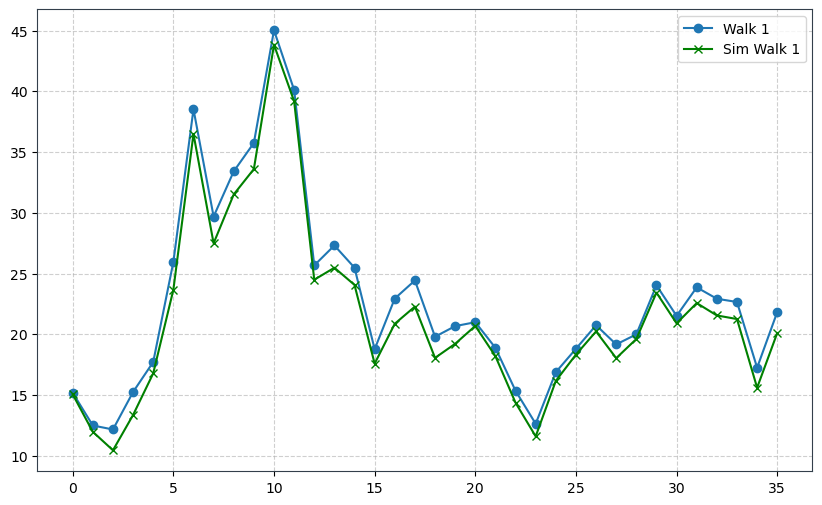

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(range(len(serie_test)), serie_test, marker='o', linestyle='-', label='Walk 1')
#ax.plot(range(len(noisy_data_walk_test)), noisy_data_walk_test, marker='o', linestyle='-', color='r', label='Sim Walk 1')
ax.plot(range(len(noisy_data_walk_test)), noisy_data_walk_test, marker='x', linestyle='-', color='g', label='Sim Walk 1')


# Add grid lines
ax.grid(True, linestyle='--', alpha=0.6)

# Add a legend
ax.legend()

plt.show()

In [77]:
g=add_transition_values(simulated_game)

In [78]:
len(sampled_labels)

5738

In [79]:
sim_g = pd.DataFrame({'label': sampled_labels, 'norm': g})

In [81]:
sim_g['norm']

0       [68.78250256525855, 118.96455766830272, 70.435...
1       [60.14626988729786, 67.78097847159634, 61.5849...
2       [27.316477935335694, 25.933627664806522, 33.69...
3       [60.30929113821769, 93.76958086528397, 37.3467...
4       [25.911877469700283, 26.986079729974897, 26.57...
                              ...                        
5733    [18.333364859303497, 18.21392678932414, 22.186...
5734    [29.18756361795649, 20.97139682807575, 26.0069...
5735    [28.262086175339316, 26.95532409250689, 18.887...
5736    [23.24565530220598, 41.011760798371036, 43.859...
5737    [14.63529896341063, 15.647856484131953, 17.119...
Name: norm, Length: 5738, dtype: object

In [46]:
sim_g[sim_g['norm'].apply(lambda x  : len(x))==1]

Empty DataFrame
Columns: [label, norm]
Index: []

In [47]:
sim_g[sim_g['norm'].isna()].groupby('label').count()

Empty DataFrame
Columns: [norm]
Index: []

In [73]:
label_mapping = {'walk': 0, 'rest': 1, 'run': 2, 'tackle': 3, 'dribble': 4, 'pass': 5, 'cross': 6, 'shot': 7, 'no action': 8}
sim_g = pd.DataFrame({'label': sampled_labels, 'norm': simulated_game})
sim_g = sim_g.explode('norm').reset_index(drop=True)
sim_g['label'] = [label_mapping[label] for label in sim_g['label']]

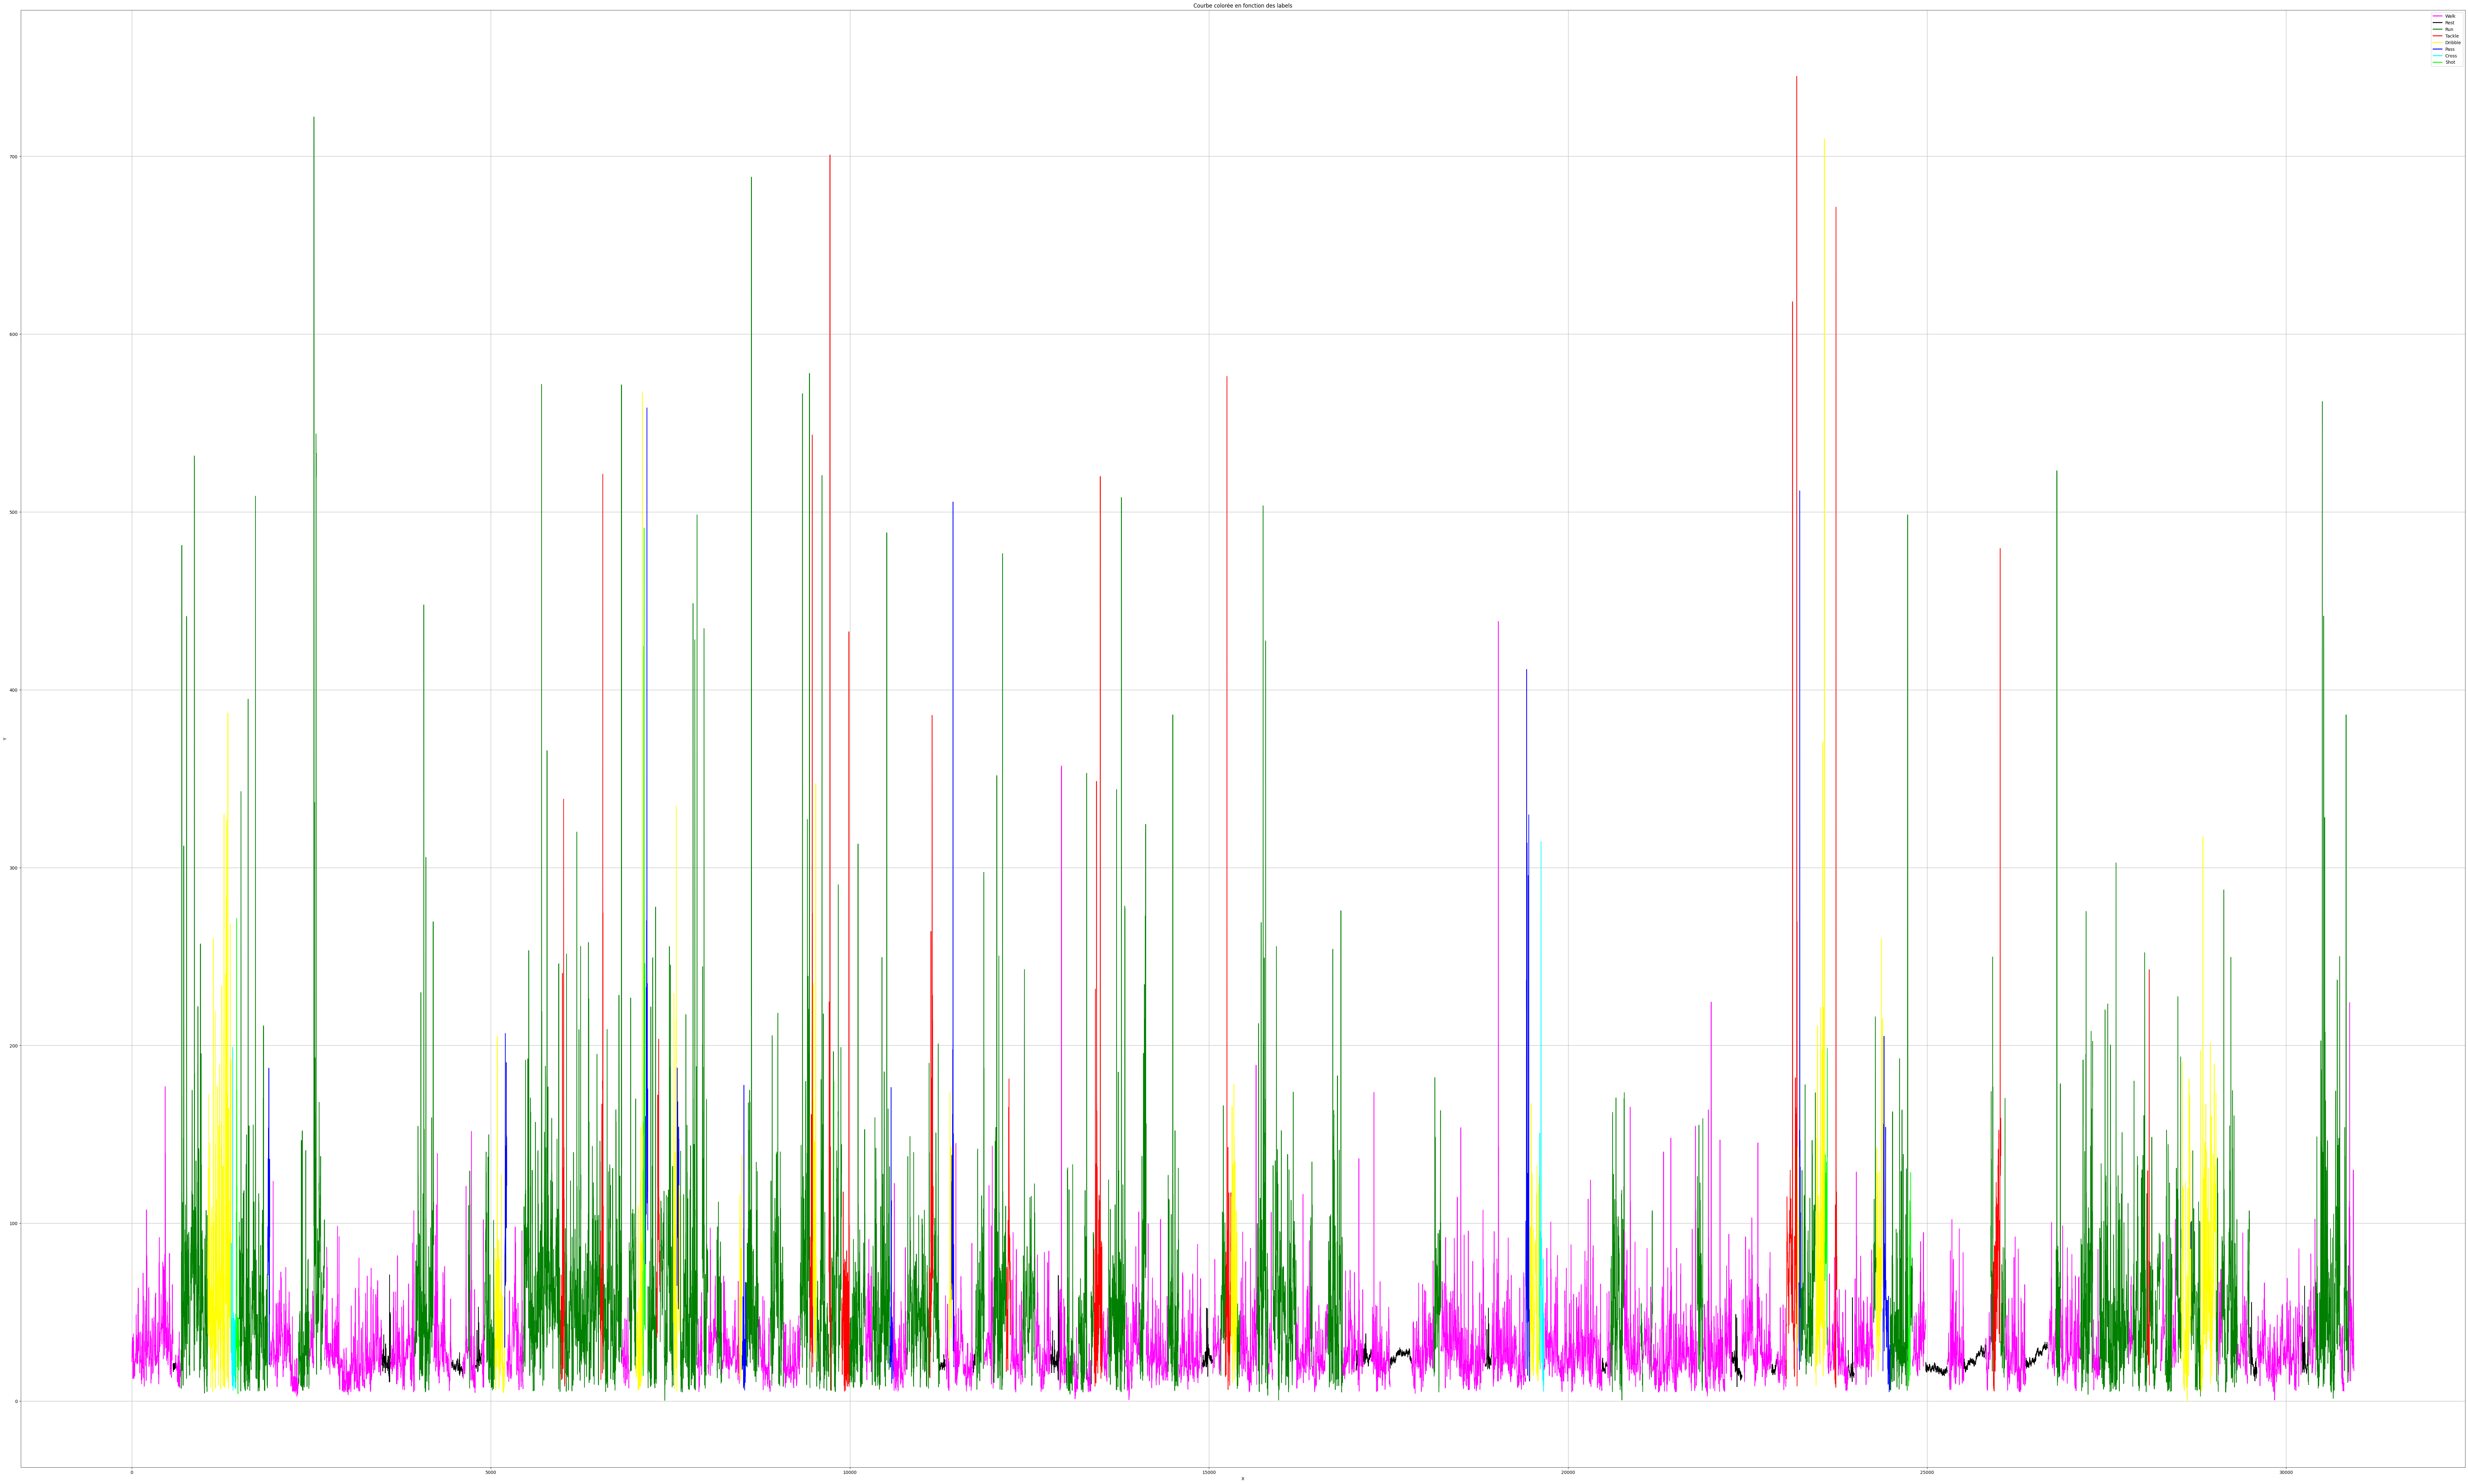

In [49]:
x = sim_g.index
y = sim_g['norm']
labels = sim_g['label']

# Création de la figure et du graphe
plt.figure(figsize=(100, 60))

# Définition des couleurs correspondantes aux labels
colors = ['fuchsia', 'black', 'green', 'red', 'yellow', 'blue', 'cyan', 'lime', 'silver']

# Tracer la courbe en colorant en fonction des labels
current_label = labels[0]
current_segment_start = 0

for i in range(1, len(x)):
    if labels[i] != current_label:
        plt.plot(x[current_segment_start:i], y[current_segment_start:i], color=colors[current_label], label=f'Label {current_label}')
        current_label = labels[i]
        current_segment_start = i

legend_elements = [
    Line2D([0], [0], color='fuchsia', lw=2, label='Walk'),
    Line2D([0], [0], color='black', lw=2, label='Rest'),
    Line2D([0], [0], color='green', lw=2, label='Run'),
    Line2D([0], [0], color='red', lw=2, label='Tackle'),
    Line2D([0], [0], color='yellow', lw=2, label='Dribble'),
    Line2D([0], [0], color='blue', lw=2, label='Pass'),
    Line2D([0], [0], color='cyan', lw=2, label='Cross'),
    Line2D([0], [0], color='lime', lw=2, label='Shot'),
]

# Tracer le dernier segment
plt.plot(x[current_segment_start:], y[current_segment_start:], color=colors[current_label], label=f'Label {current_label}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Courbe colorée en fonction des labels')
plt.legend(handles=legend_elements)
plt.grid(True)
plt.show()

In [27]:

# Number of data points for each action
num_samples = 1000  # You can change this as needed

# Generate noisy data for each action while respecting their distribution
noisy_data = {}
for action, stats in actions.items():
    mean = stats['mean']
    std = stats['std']
    noise = np.random.normal(mean, std, num_samples)
    noisy_data[action] = noise

# You can access the noisy data for each action like this:
walk_data = noisy_data['walk']
rest_data = noisy_data['rest']
# ... and so on for other actions

In [18]:
# Define the size of the moving window
window_size = 50 #1 seconde


    # Define the label you want to analyze
for target_label in ['walk', 'rest', 'run', 'tackle', 'dribble', 'pass', 'shot', 'cross'] :



    # Calculate the proportion of the target label within each window
    proportions = [
        sum(1 for label in sampled_labels[i:i + window_size] if label == target_label) / window_size
        for i in range(len(sampled_labels) - window_size + 1)
    ]

    mean_proportion = sum(proportions) / len(proportions)


    # Plot the proportions over time
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(proportions)), proportions)
    plt.axhline(y=mean_proportion, color='r', linestyle='--', label='Mean Proportion')

    plt.xlabel('Time')
    plt.ylabel('Proportion of ' + target_label)
    plt.title('Proportion of ' + target_label + ' Over Time')
    plt.xticks(range(len(proportions)), range(window_size - 1, len(sampled_labels)))
    plt.show()

NameError: name 'sampled_labels' is not defined

In [131]:
# Select two actions for DTW comparison
action1 = 'walk'
action2 = 'rest'

dtw_distances = []

subset_action1 = df[df['label'] == action1]['norm']
#len(subset_action1)
for i in range(15):
    dtw_row = []
    for j in range(15):
        dtw_distance, _ = fastdtw(subset_action1.iloc[i], subset_action1.iloc[j])
        dtw_row.append(dtw_distance)
    dtw_distances.append(dtw_row)

# Convert the DTW distances to a DataFrame
dtw_distance_df = pd.DataFrame(dtw_distances, index=range(1, 15+1),
                                columns=range(1, 15+1))

print(dtw_distance_df)


            1           2           3           4           5           6   \
1     0.000000  165.141459  140.721108  317.457134  377.904423  331.612902   
2   165.141459    0.000000  326.713116  363.144490  375.729618  346.627840   
3   140.721108  326.713116    0.000000  155.147477  466.697324  369.323323   
4   317.457134  363.144490  155.147477    0.000000  412.208803  473.876030   
5   377.904423  375.729618  466.697324  412.208803    0.000000  455.244206   
6   331.612902  346.627840  369.323323  473.876030  455.244206    0.000000   
7   249.515526  302.448774  308.805062  390.321880  374.337702  298.938317   
8   691.341715  611.074419  734.913194  838.989325  690.656669  598.074001   
9   313.754060  347.105328  324.771295  548.015391  380.439646  497.466344   
10  366.624000  378.688404  613.523389  589.789224  304.518689  463.216778   
11  243.628586  269.246794  244.827305  276.430752  276.005308  332.681939   
12  473.169696  442.067258  529.834354  483.498128  678.402071  

In [134]:
print(  dtw_distance_df/(dtw_distance_df.max().max()))

          1         2         3         4         5         6         7   \
1   0.000000  0.167023  0.142325  0.321074  0.382211  0.335392  0.252359   
2   0.167023  0.000000  0.330436  0.367282  0.380011  0.350578  0.305895   
3   0.142325  0.330436  0.000000  0.156915  0.472015  0.373532  0.312324   
4   0.321074  0.367282  0.156915  0.000000  0.416906  0.479276  0.394769   
5   0.382211  0.380011  0.472015  0.416906  0.000000  0.460432  0.378603   
6   0.335392  0.350578  0.373532  0.479276  0.460432  0.000000  0.302345   
7   0.252359  0.305895  0.312324  0.394769  0.378603  0.302345  0.000000   
8   0.699219  0.618037  0.743287  0.848549  0.698526  0.604889  0.573323   
9   0.317329  0.351060  0.328472  0.554260  0.384775  0.503135  0.388935   
10  0.370802  0.383003  0.620514  0.596510  0.307989  0.468495  0.428687   
11  0.246405  0.272315  0.247617  0.279581  0.279150  0.336473  0.200855   
12  0.478561  0.447104  0.535872  0.489007  0.686132  0.335321  0.401102   
13  0.274843

In [5]:
# Select two actions for DTW comparison
action1 = 'walk'
action2 = 'rest'

dtw_distance = pd.DataFrame()

for i in range(len(df[df['label'] == action1]['norm'])):
    for j in range(len(df[df['label'] == action1]['norm'])):
        # Compute DTW distance between two actions
        subset_action1 = df[df['label'] == action1]['norm'].iloc[0]
        subset_action2 = df[df['label'] == action1]['norm'].iloc[0]

        # Compute DTW distance between two actions
        dtw_distance[i,j] = fastdtw(subset_action1, subset_action2)



NameError: name 'subset_action1' is not defined

In [19]:

# Calculate the maximum length of series in the "norm" column
max_length = df['norm'].apply(len).max()

# Expand the "norm" column into separate columns
expanded_norm = df['norm'].apply(pd.Series)

# Rename the expanded columns
expanded_norm.columns = [f'Value_{i + 1}' for i in range(max_length)]

# Concatenate the expanded columns with the "label" column
result_df = pd.concat([df['label'], expanded_norm], axis=1)

print(result_df)

      label    Value_1    Value_2    Value_3    Value_4    Value_5  \
0      walk  23.177037  23.361525  21.535253  23.400315  23.007525   
1      walk  20.998214  19.182798  18.272491  19.690260  20.830143   
2      walk  21.952597  20.627205  22.555408  20.016869  20.381994   
3      walk  19.392097  19.304607  18.978771  22.324970  21.747552   
4      rest  22.069263  19.672270  19.882150  21.101266  20.078084   
..      ...        ...        ...        ...        ...        ...   
569    walk  21.245737  21.938836  21.245737  21.088881  21.245737   
570    walk  20.272348  21.820303  21.211776  20.638558  21.522611   
571     run  90.213060  72.127128  63.564388  70.379536  60.210597   
572  tackle  44.795103  27.264069  88.616417  60.052678  85.664416   
573     run  21.329404  27.394755  43.789041  14.375416  25.502124   

        Value_6    Value_7     Value_8    Value_9  ...  Value_218  Value_219  \
0     22.927317  23.143662   22.916891  22.265134  ...        NaN        NaN   

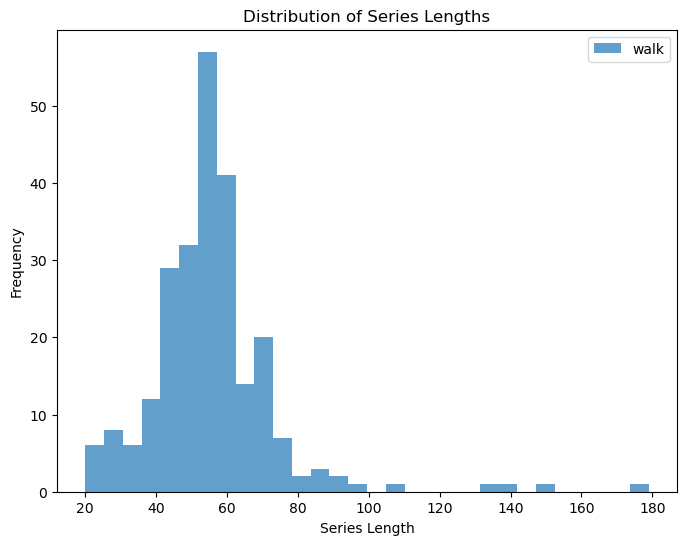

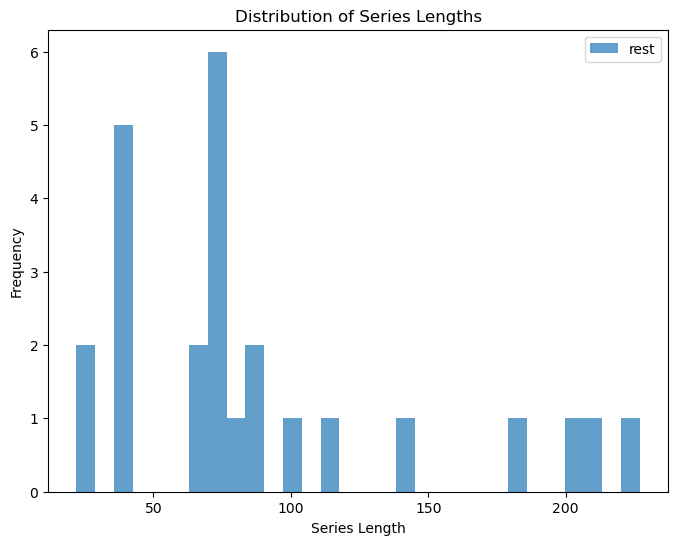

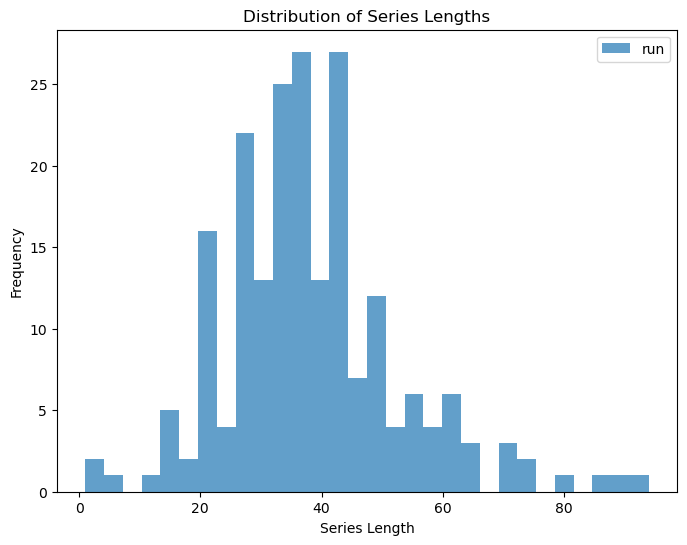

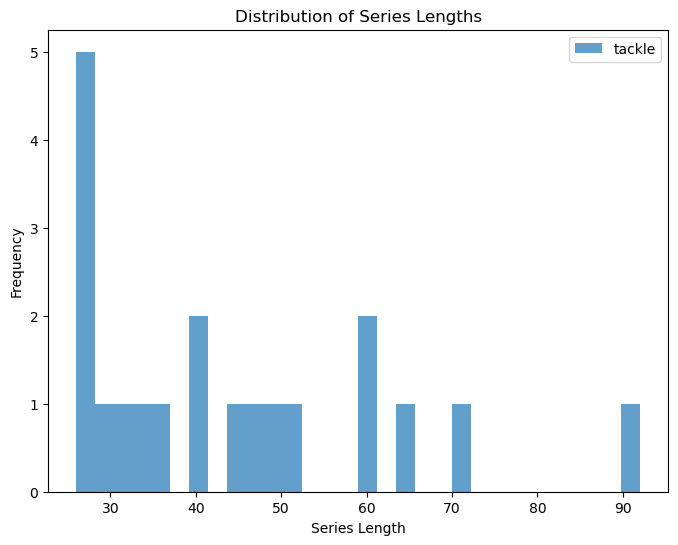

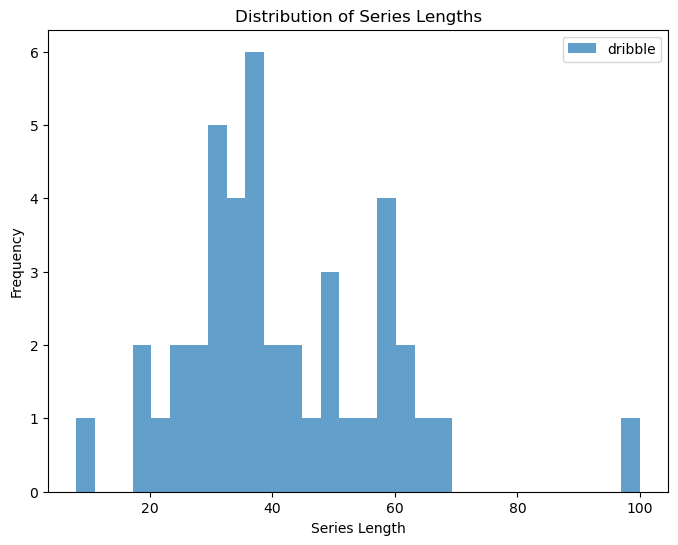

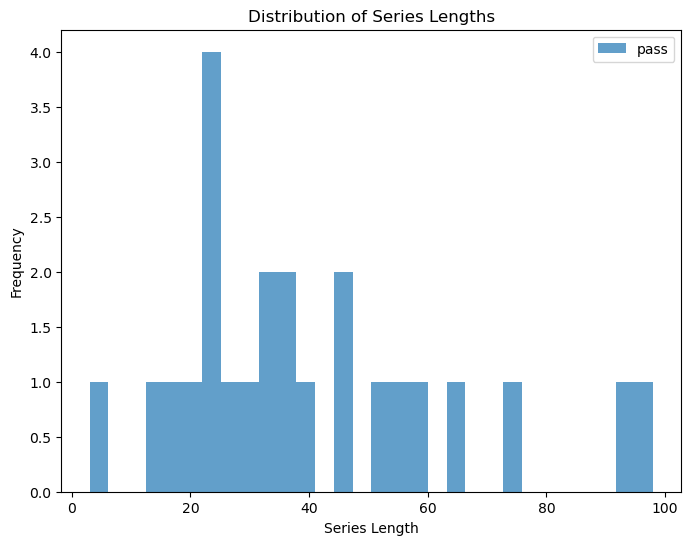

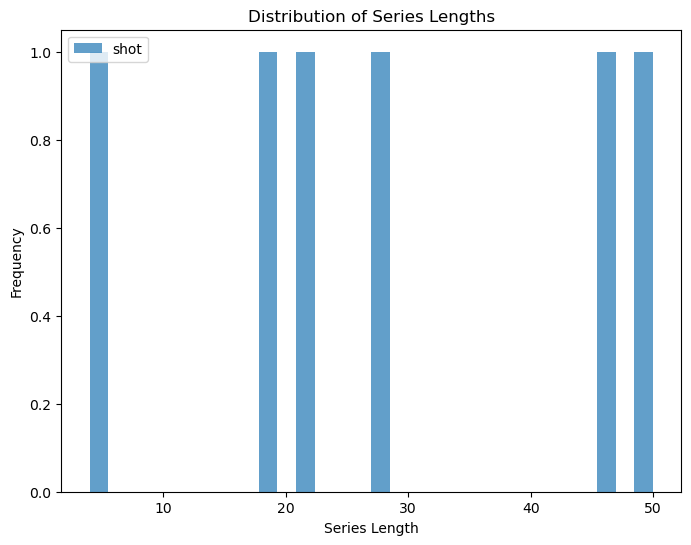

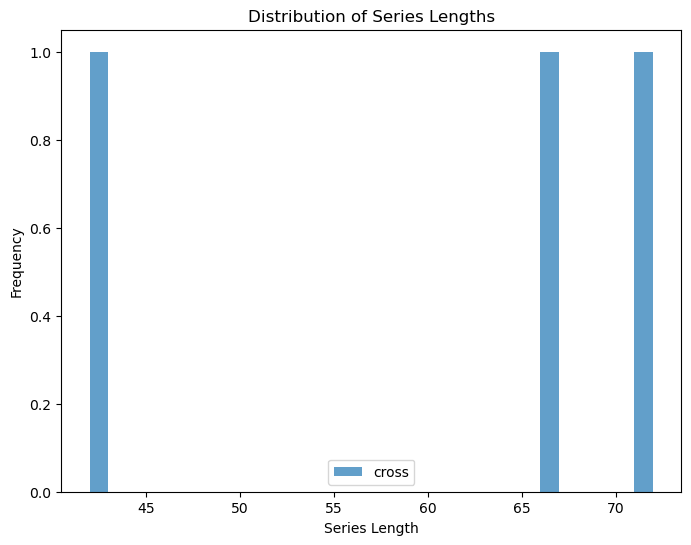

In [41]:
for target_label in ['walk', 'rest', 'run', 'tackle', 'dribble', 'pass', 'shot', 'cross'] :

    # Calculate the lengths of each series
    series_lengths = df[df['label']==target_label].applymap(len)

    # Plot the distribution of series lengths
    plt.figure(figsize=(8, 6))
    plt.hist(series_lengths['norm'].values, bins=30, alpha=0.7, label=target_label)
    plt.xlabel('Series Length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Series Lengths')
    plt.legend()
    plt.show()

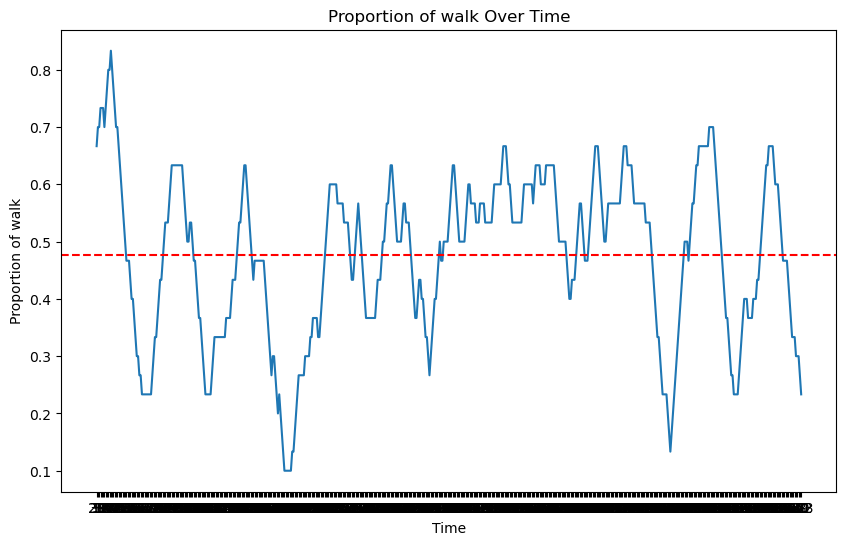

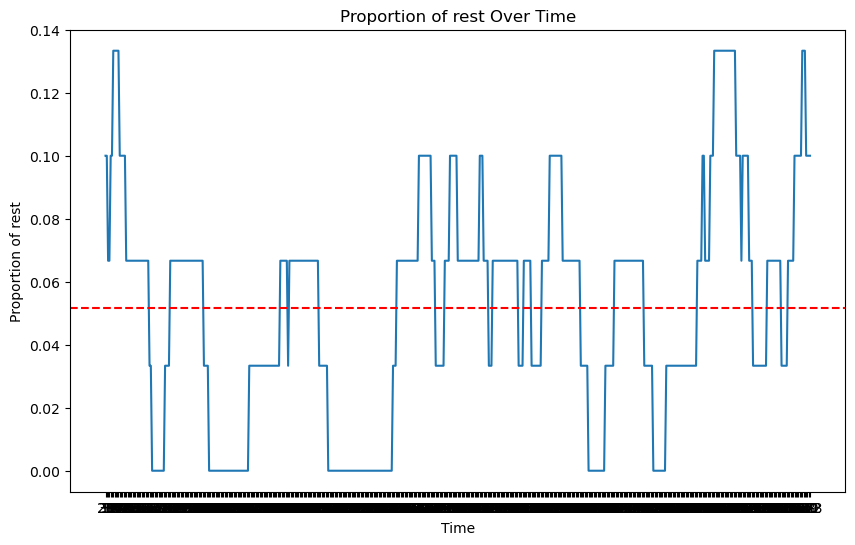

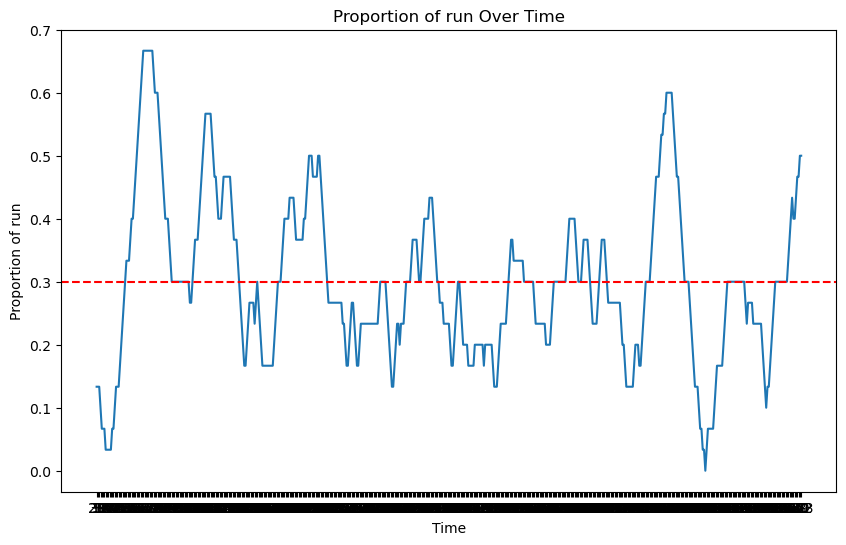

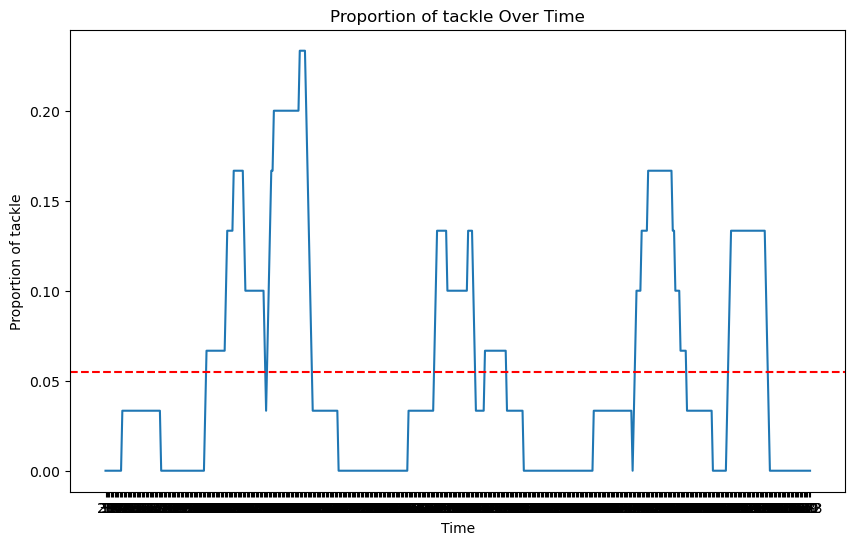

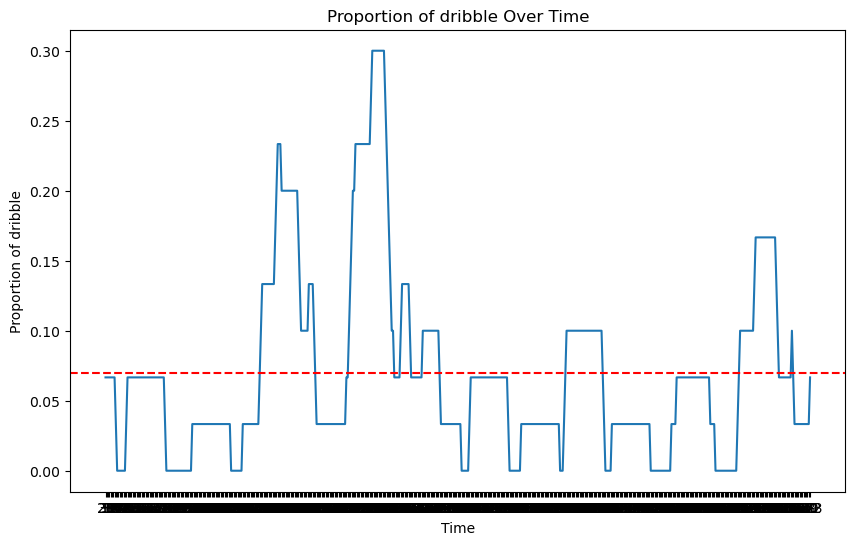

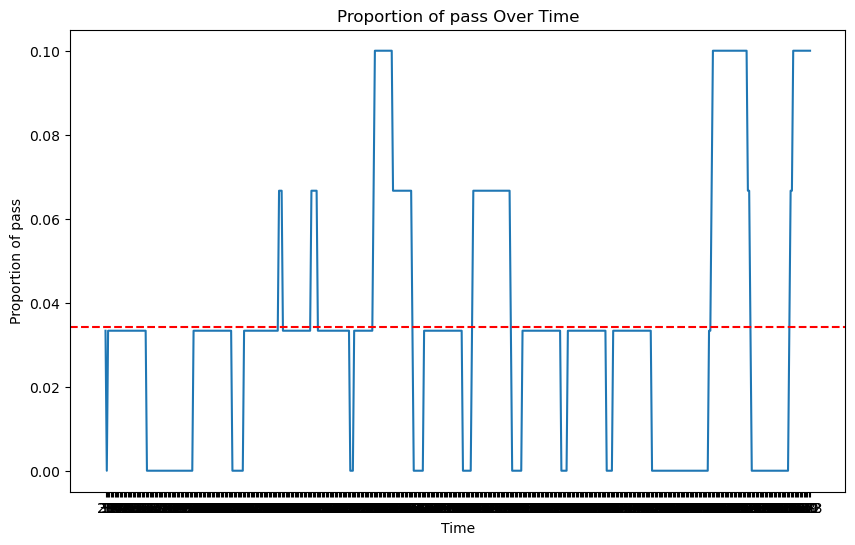

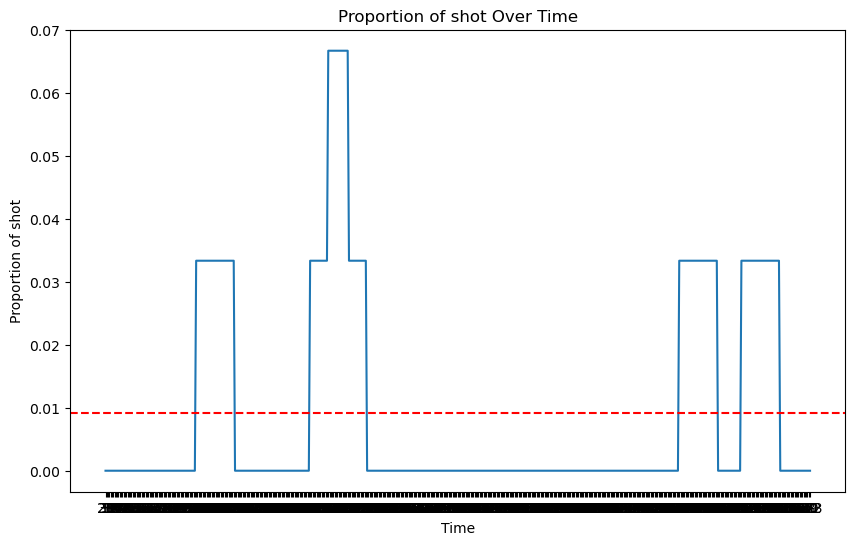

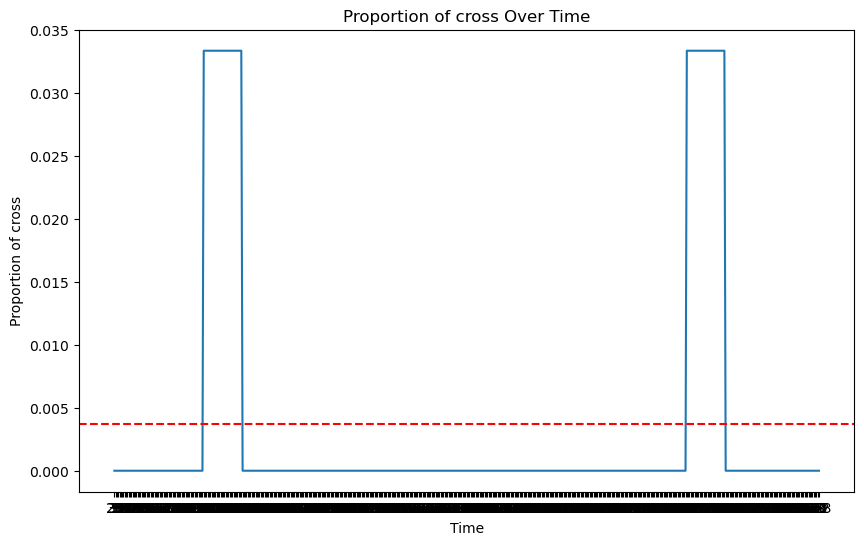

In [31]:
# Define the size of the moving window
window_size = 30


    # Define the label you want to analyze
for target_label in ['walk', 'rest', 'run', 'tackle', 'dribble', 'pass', 'shot', 'cross'] :



    # Calculate the proportion of the target label within each window
    proportions = [
        sum(1 for label in sampled_labels[i:i + window_size] if label == target_label) / window_size
        for i in range(len(sampled_labels) - window_size + 1)
    ]

    mean_proportion = sum(proportions) / len(proportions)


    # Plot the proportions over time
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(proportions)), proportions)
    plt.axhline(y=mean_proportion, color='r', linestyle='--', label='Mean Proportion')

    plt.xlabel('Time')
    plt.ylabel('Proportion of ' + target_label)
    plt.title('Proportion of ' + target_label + ' Over Time')
    plt.xticks(range(len(proportions)), range(window_size - 1, len(sampled_labels)))
    plt.show()

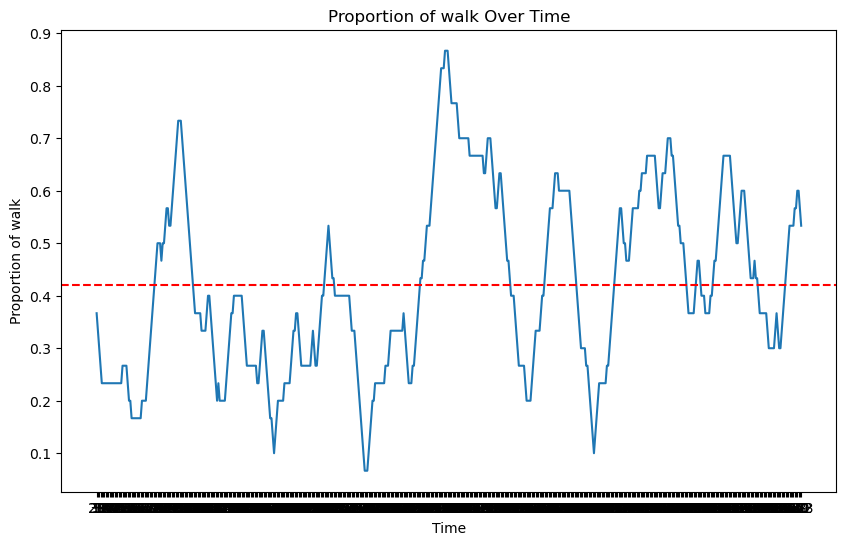

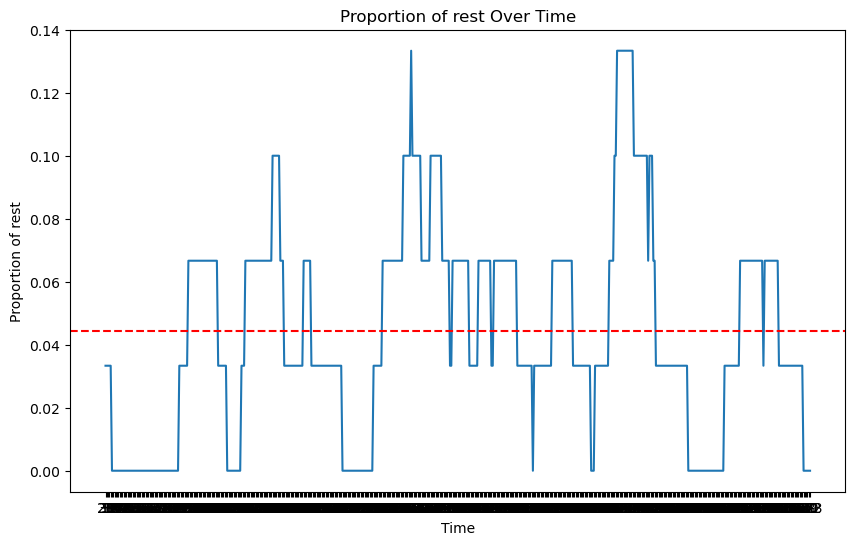

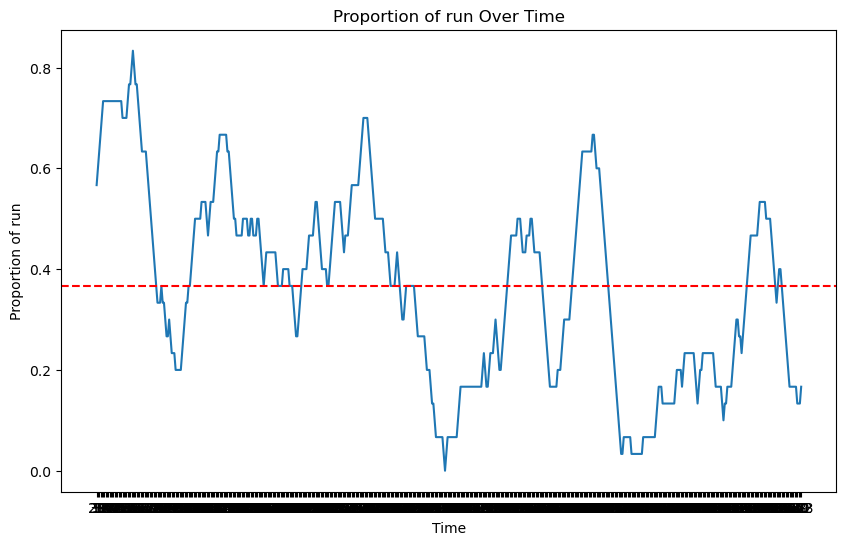

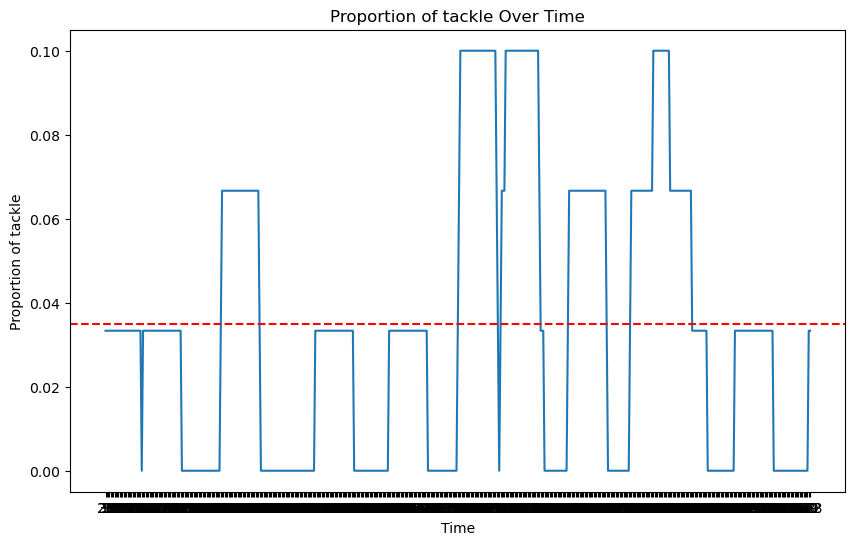

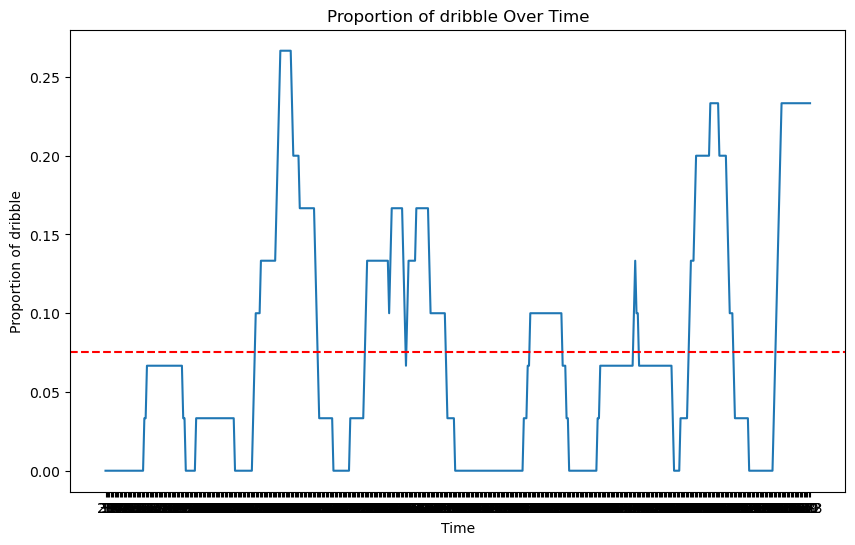

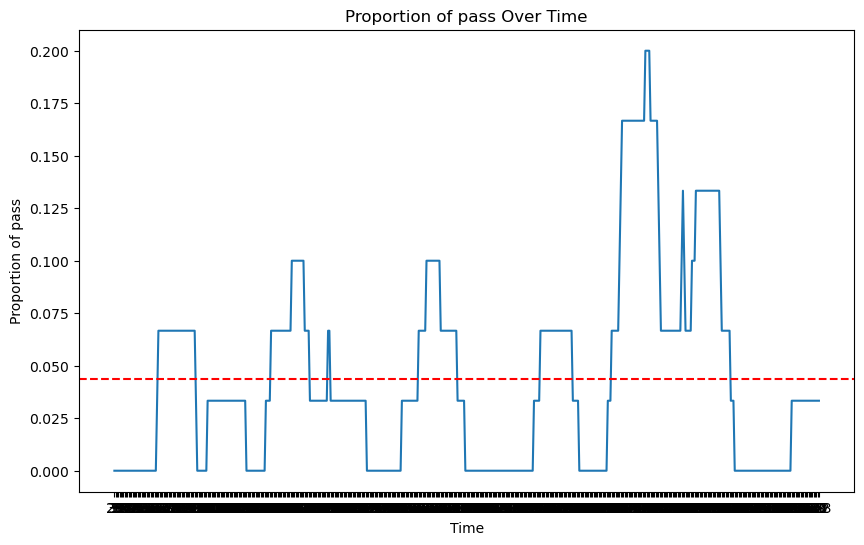

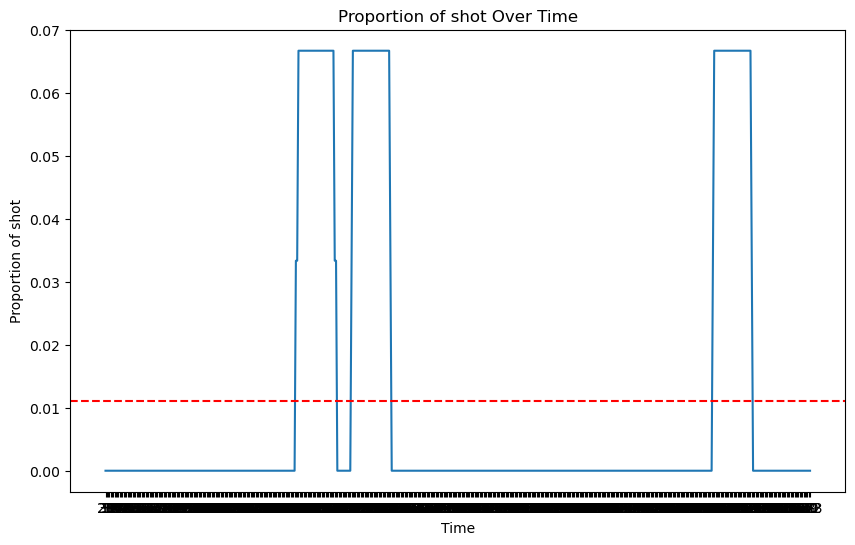

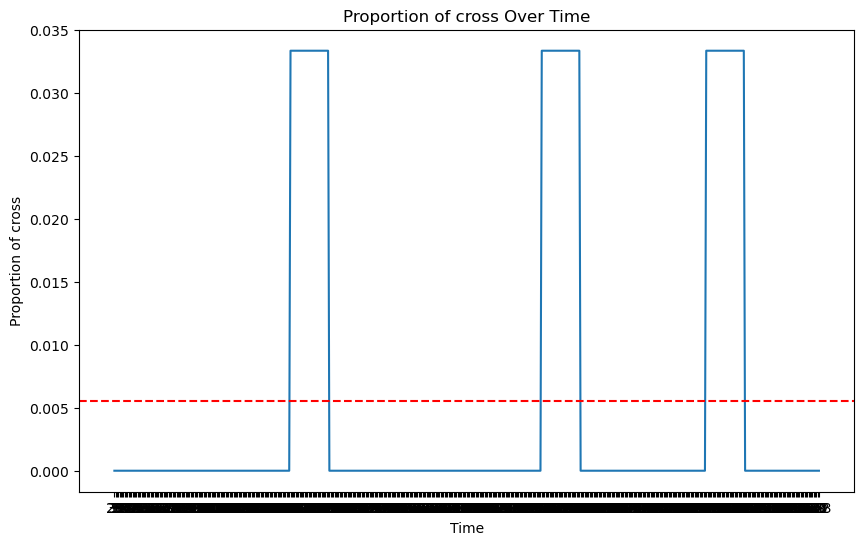

In [32]:
# Define the size of the moving window
window_size = 30


    # Define the label you want to analyze
for target_label in ['walk', 'rest', 'run', 'tackle', 'dribble', 'pass', 'shot', 'cross'] :

    # Calculate the proportion of the target label within each window
    proportions = [
        sum(1 for label in labels_1[i:i + window_size] if label == target_label) / window_size
        for i in range(len(labels_1) - window_size + 1)
    ]

    mean_proportion = sum(proportions) / len(proportions)


    # Plot the proportions over time
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(proportions)), proportions)
    plt.axhline(y=mean_proportion, color='r', linestyle='--', label='Mean Proportion')

    plt.xlabel('Time')
    plt.ylabel('Proportion of ' + target_label)
    plt.title('Proportion of ' + target_label + ' Over Time')
    plt.xticks(range(len(proportions)), range(window_size - 1, len(labels_1)))
    plt.show()

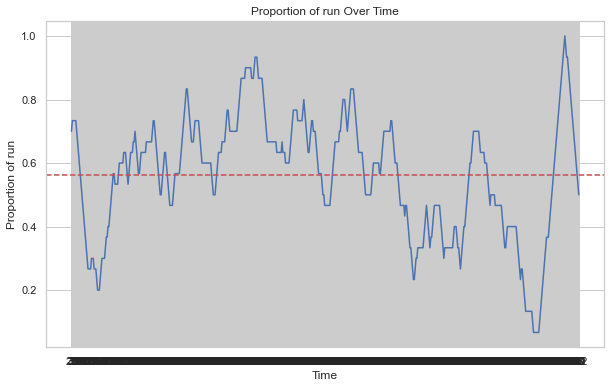

In [41]:
# Define the label you want to analyze
target_label = 'run'

# Define the size of the moving window
window_size = 30

# Calculate the proportion of the target label within each window
proportions = [
    sum(1 for label in labels_2[i:i + window_size] if label == target_label) / window_size
    for i in range(len(labels_2) - window_size + 1)
]
# Calculate the mean of the proportions
mean_proportion = sum(proportions) / len(proportions)

# Plot the proportions over time
plt.figure(figsize=(10, 6))
plt.plot(range(len(proportions)), proportions)
plt.axhline(y=mean_proportion, color='r', linestyle='--', label='Mean Proportion')
plt.xlabel('Time')
plt.ylabel('Proportion of ' + target_label)
plt.title('Proportion of ' + target_label + ' Over Time')
plt.xticks(range(len(proportions)), range(window_size - 1, len(labels_2)))
plt.show()

In [11]:
# Calculate the percentages for each label
label_percentages = {}
for i in range(len(labels) - 1):
    current_label = labels[i]
    next_label = labels[i + 1]
    
    if current_label not in label_percentages:
        label_percentages[current_label] = {'total': 0, 'followed': 0}
    
    label_percentages[current_label]['total'] += 1
    if next_label != current_label:
        label_percentages[current_label]['followed'] += 1

# Calculate and display the percentages
for label, data in label_percentages.items():
    percentage = (data['followed'] / data['total']) * 100 if data['total'] > 0 else 0
    print(f"The percentage of labels following '{label}' is: {percentage:.2f}%")

The percentage of labels following 'walk' is: 24.90%
The percentage of labels following 'rest' is: 100.00%
The percentage of labels following 'run' is: 28.37%
The percentage of labels following 'tackle' is: 70.00%
The percentage of labels following 'dribble' is: 54.76%
The percentage of labels following 'pass' is: 79.17%
The percentage of labels following 'cross' is: 100.00%
The percentage of labels following 'shot' is: 66.67%


In [185]:
def combine_json_files_in_folder(folder_path):
    """
    Combine all .json files in a folder into a single DataFrame.

    Args:
        folder_path (str): The path to the folder containing .json files.

    Returns:
        pd.DataFrame: A DataFrame containing the combined data from all .json files.
    """
    # Initialize an empty DataFrame to store the combined data
    combined_df = pd.DataFrame()

    # List all files in the specified folder
    files = os.listdir(folder_path)

    # Iterate through the files and combine them
    for file in files:
        if file.endswith(".json"):
            file_path = os.path.join(folder_path, file)
            df = pd.read_json(file_path)
            combined_df = pd.concat([combined_df, df], ignore_index=True)

    return combined_df
